# Global Power Plant Database
### Project Description
### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
### Key attributes of the database
### The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
## Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

### Hint : Use pandas methods to combine all the datasets and then start working on this project.


### Dataset Link-
## https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")

df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

In [6]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         394
generation_gwh_2014         374
generation_gwh_2015         399
generation_gwh_2016         404
generation_gwh_2017         409
generation_gwh_2018         412
generation_gwh_2019           1
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh' columns are total null values present. So we can drop this columns.

In [7]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are two types of data type present object and float, means categorical and continuous type.

### categorical : 
    country, country_long, name, gppd_idnr, 
    primary_fuel, other_fuel1, other_fuel2, owner, source, url, 
    geolocation_source, generation_gwh_2019, generation_data_source
    
### continous : 
    capacity_mw, latitude, longitude, other_fuel3, commissioning_year, 
    wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, 
    generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, estimated_generation_gwh

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,533.000000,0.0,519.0,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.078799,NaN,2019.0,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215,NaN
std,590.085456,6.239612,4.939316,NaN,17.119477,NaN,0.0,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


1. DATA DISTRIBUTION IS NOT GOOD
2. SKEWNESS AND OUTLIERS ARE PRESENT
3. SOME COLUMNS ARE NOT CONTAIN ANY KIND OF DATA
4. 50% - 75% AND max data not distributed equally.
5. NaN are Present

In [9]:
df.drop(columns = ['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,...,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,...,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


drop the column country, country_long, name, gppd_idnr and url bcz this data not affect our model.

In [10]:
df.drop(columns = ['country','country_long','name','gppd_idnr', 'url'],inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.dtypes[df.dtypes == 'object']

primary_fuel              object
source                    object
geolocation_source        object
generation_gwh_2019       object
generation_data_source    object
dtype: object

In [12]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [13]:
df.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [14]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [15]:
df.generation_gwh_2019.value_counts()

Central Electricity Authority    1
Name: generation_gwh_2019, dtype: int64

In [16]:
df.generation_data_source.value_counts()

Central Electricity Authority    454
Name: generation_data_source, dtype: int64

This object data like source and generation_data_source they not contribute to build good model hence drop this column.

In [17]:
df.drop(columns = ['source', 'generation_data_source' ], inplace = True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.drop(columns = ['generation_gwh_2019' ], inplace = True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.dtypes[df.dtypes == 'object']

primary_fuel          object
geolocation_source    object
dtype: object

In [20]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [21]:
df.geolocation_source.isna().sum()

19

In [22]:
df.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In geolocation_source column WRI is most frequently occuring data.

use simple imputer 

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

In [25]:
si = si.fit(df[['geolocation_source']])

In [26]:
df[['geolocation_source']] = si.transform(df[['geolocation_source']])

In [27]:
df[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

Now No Null values are present in geolocation_source column.

In [28]:
df.select_dtypes(exclude = object).isnull().sum()    # check continues data

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       374
year_of_capacity_data    388
generation_gwh_2013      461
generation_gwh_2014      503
generation_gwh_2015      479
generation_gwh_2016      467
generation_gwh_2017      461
generation_gwh_2018      454
dtype: int64

In [29]:
df.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [30]:
df.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
902    77.3568
903    78.1654
904    75.5811
905    73.7477
906    77.4768
Name: longitude, Length: 907, dtype: float64

#### for this purpose we use KNNImputer Technique to remove null values.

In [31]:
from sklearn.impute import KNNImputer

In [32]:
knnim = KNNImputer(n_neighbors=2)

In [33]:
df[['latitude','longitude']] = knnim.fit_transform(df[['latitude','longitude']])

In [34]:
df[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [35]:
df.commissioning_year.isna().sum()

374

In [36]:
df.commissioning_year.mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [37]:
df.commissioning_year.mean()

1997.078799249531

In [38]:
df.commissioning_year.median()

2001.0

In [39]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median' )

si = si.fit(df[['commissioning_year']])

df[['commissioning_year']] = si.transform(df[['commissioning_year']])

In [40]:
df[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [41]:
df.commissioning_year = df.commissioning_year.astype('int64')

In [42]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,2001,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,2001,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2001,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,2001,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,2001,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [44]:
df.year_of_capacity_data.unique()

array([  nan, 2019.])

In [45]:
df.drop(columns = 'year_of_capacity_data',inplace = True)

In [46]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,2001,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,2001,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004,WRI,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2001,Industry About,1.92500,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,2001,WRI,2.05400,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,2001,WRI,NaN,NaN,NaN,NaN,NaN,NaN


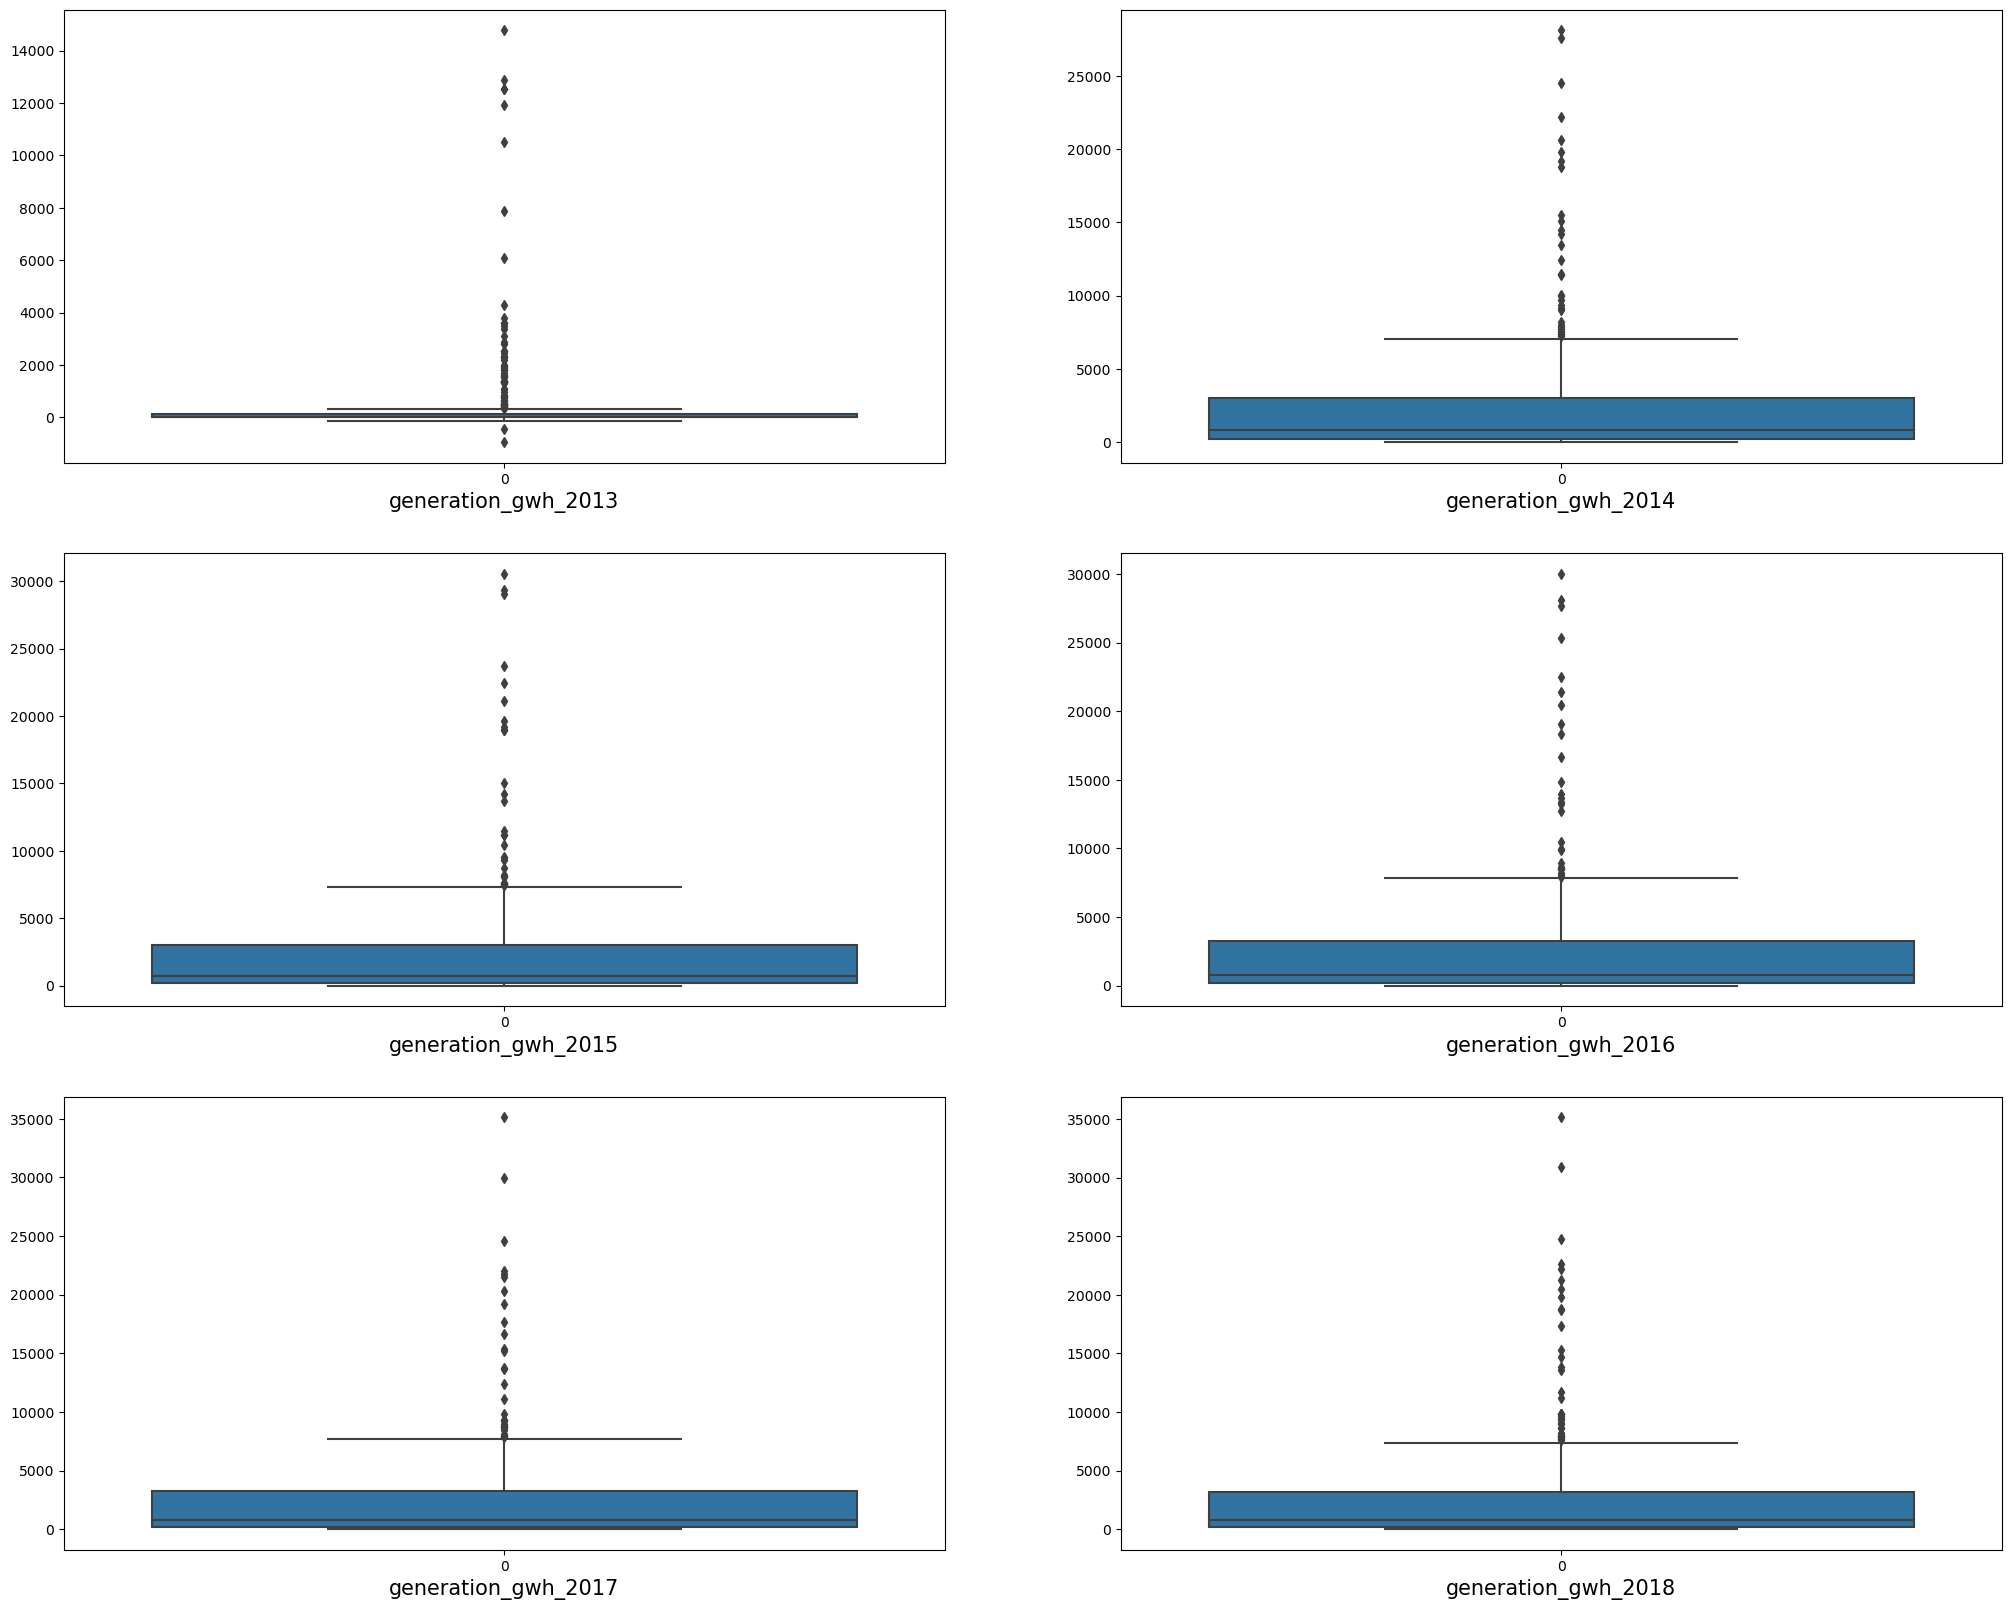

In [47]:
plt.figure(figsize=(25,20), facecolor = 'white')
plotnumber = 1

ax = df.drop(columns = ['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year'])
for col in ax:
    if plotnumber <=6:
        plt.subplot(3,2, plotnumber)
        sns.boxplot(ax[col])
        plt.xlabel(col, fontsize = 15)
    plotnumber +=1
plt.show()

Here all columns have outliers. We use SimpleImputer to remove NaN present.

In [48]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median')

si = si.fit(df[['generation_gwh_2013']])

df[['generation_gwh_2013']] = si.transform(df[['generation_gwh_2013']])

df[['generation_gwh_2013']].isnull().sum()

generation_gwh_2013    0
dtype: int64

In [49]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median')

si = si.fit(df[['generation_gwh_2014']])

df[['generation_gwh_2014']] = si.transform(df[['generation_gwh_2014']])

df[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [50]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median')

si = si.fit(df[['generation_gwh_2015']])

df[['generation_gwh_2015']] = si.transform(df[['generation_gwh_2015']])

df[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [51]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median')

si = si.fit(df[['generation_gwh_2016']])

df[['generation_gwh_2016']] = si.transform(df[['generation_gwh_2016']])

df[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [52]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median')

si = si.fit(df[['generation_gwh_2017']])

df[['generation_gwh_2017']] = si.transform(df[['generation_gwh_2017']])

df[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [53]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'median')

si = si.fit(df[['generation_gwh_2018']])

df[['generation_gwh_2018']] = si.transform(df[['generation_gwh_2018']])

df[['generation_gwh_2018']].isnull().sum()

generation_gwh_2018    0
dtype: int64

In [54]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

## Now No Null values are present in our dataframe.

In [55]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.699495
generation_gwh_2013    8.998635
generation_gwh_2014    5.312271
generation_gwh_2015    5.557765
generation_gwh_2016    5.273076
generation_gwh_2017    5.304061
generation_gwh_2018    5.130930
dtype: float64

In [56]:
df.dtypes[df.dtypes == 'object']

primary_fuel          object
geolocation_source    object
dtype: object

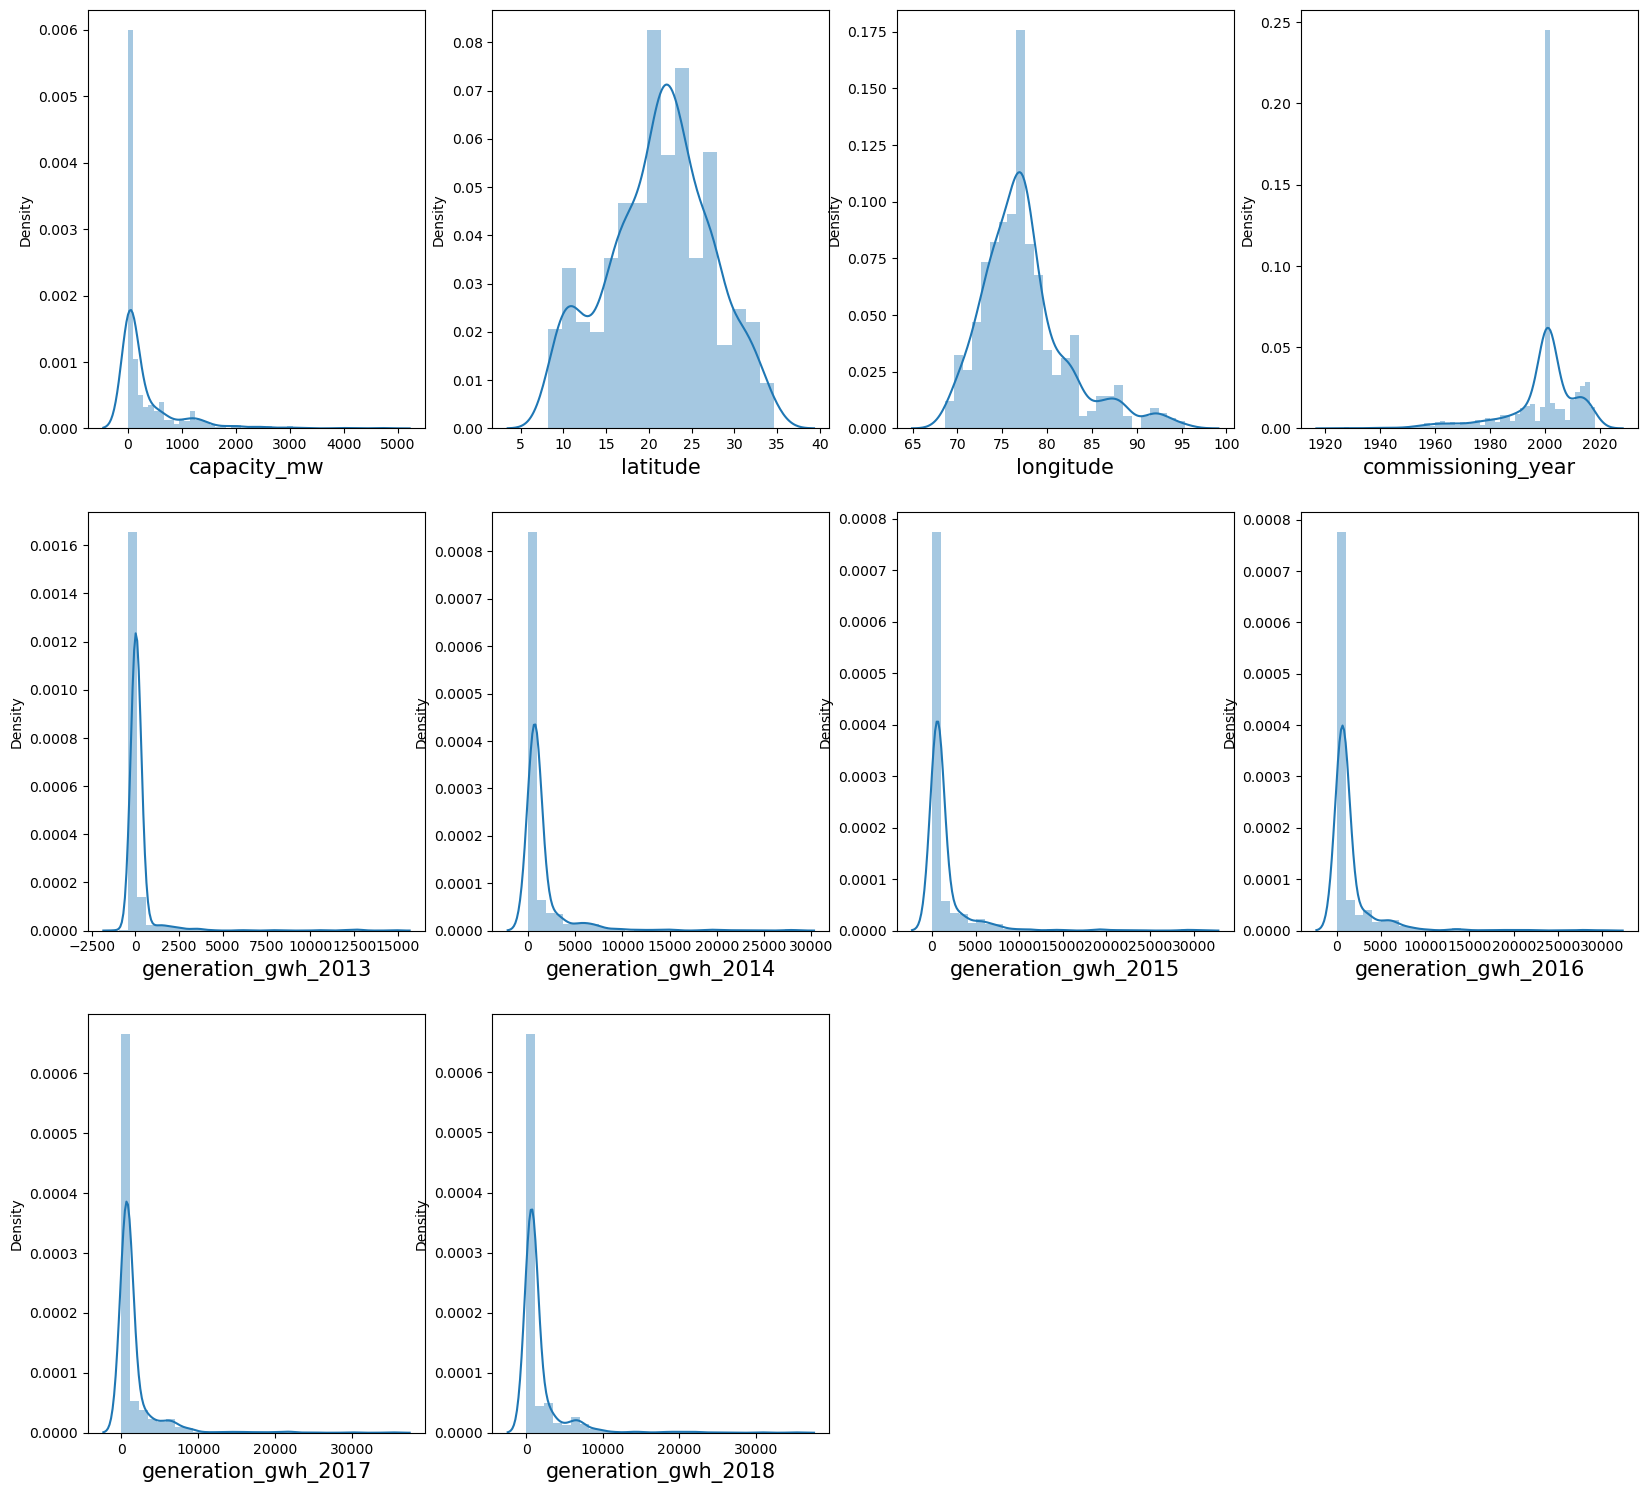

In [57]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for col in df.drop(columns = ['primary_fuel','geolocation_source']):
    if plotnumber <= 10:
        plt.subplot(4,4, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
    plotnumber +=1
plt.show()

<Figure size 600x600 with 0 Axes>

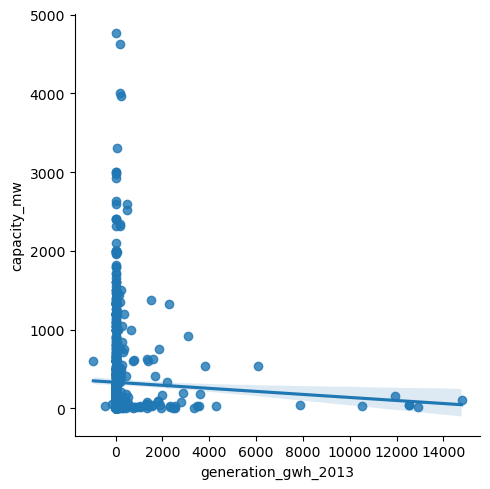

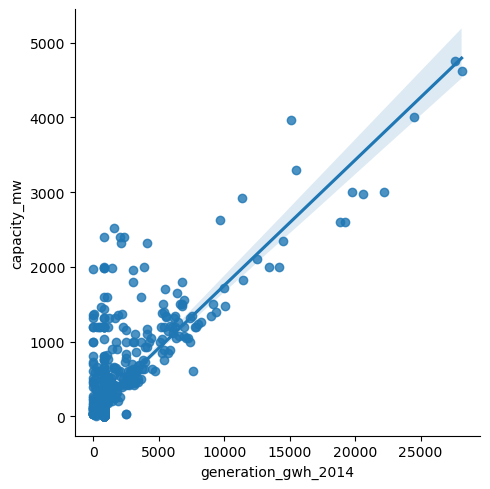

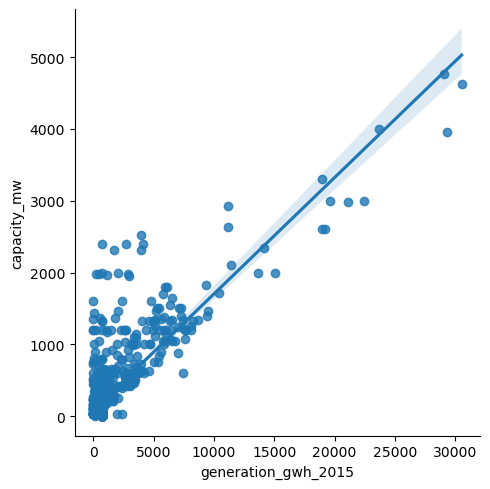

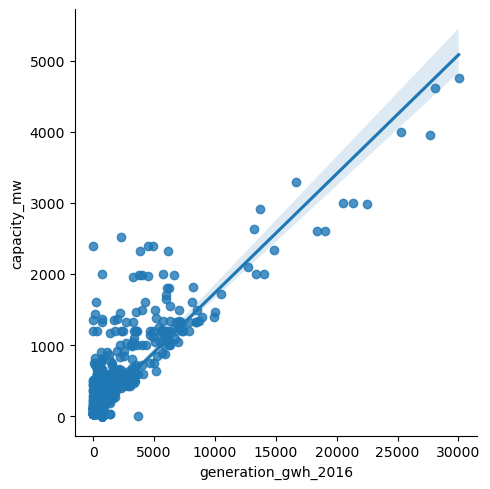

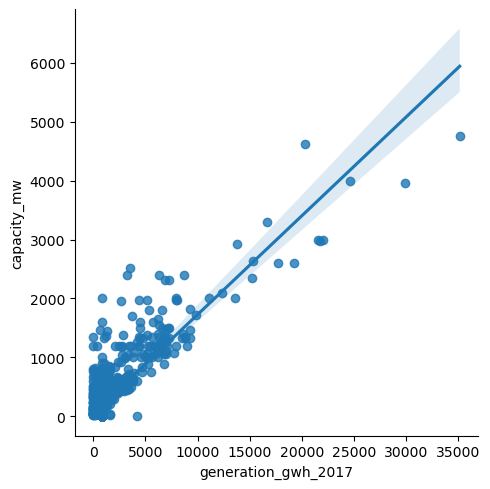

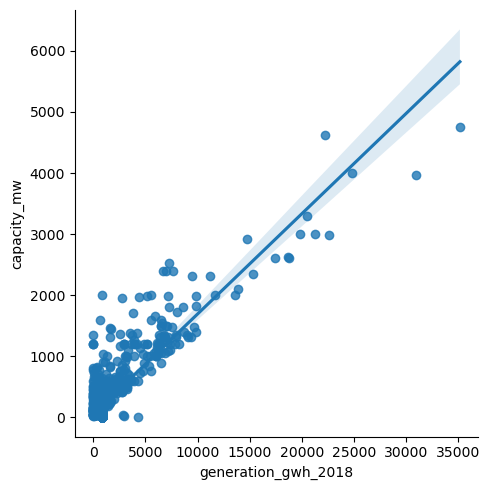

In [58]:
plt.figure(figsize=(6,6),facecolor='white')
x = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']
for col in x:
    sns.lmplot(x = col,y = 'capacity_mw',data = df)

In [59]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [60]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

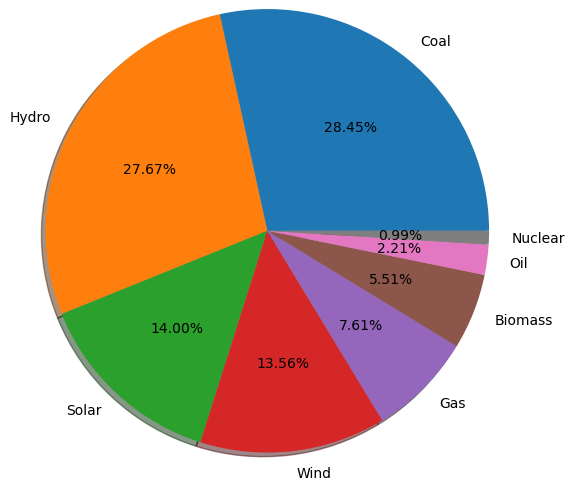

In [61]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'

fig, ax = plt.subplots()

ax.pie(df['primary_fuel'].value_counts(), labels = labels, radius =1.5, autopct = '%1.2f%%', shadow=True)

plt.show()

## checking outliers

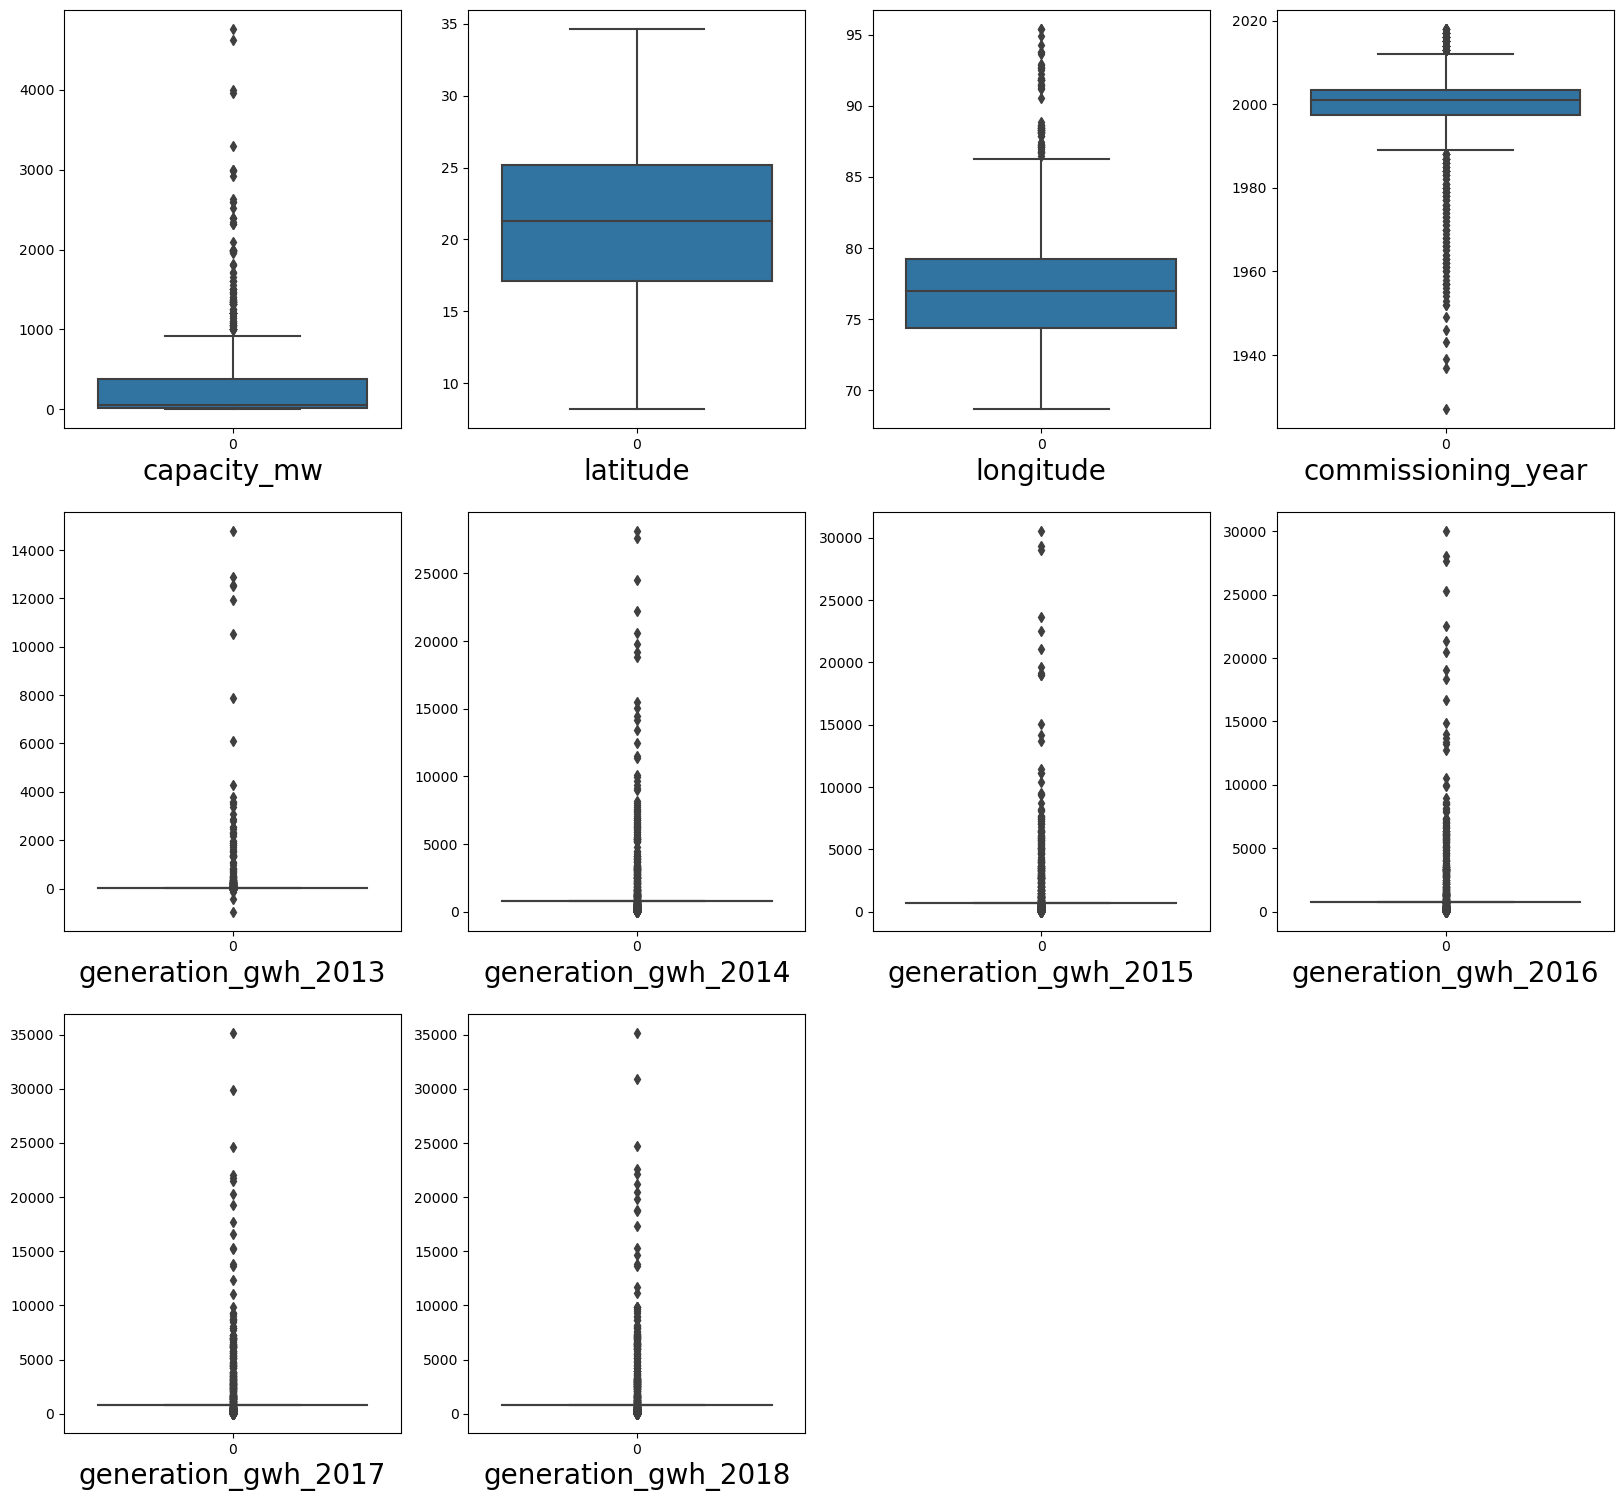

In [62]:
plt.figure(figsize=(20,25),facecolor='white')

plotnumber = 1

x = df.drop(columns=['primary_fuel','geolocation_source'])
for col in x:
    if plotnumber <= 16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [63]:
df2 = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [64]:
from scipy.stats import zscore

zscore = zscore(df2)

z_score_abs = np.abs(zscore)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [65]:
df3.shape

(844, 9)

In [66]:
df2.shape

(907, 9)

df2 and df3 rows data are not equal.

In [67]:
dropindex = df.index.difference(df3.index)

In [68]:
df.drop(dropindex,inplace = True)

In [69]:
df.shape

(844, 12)

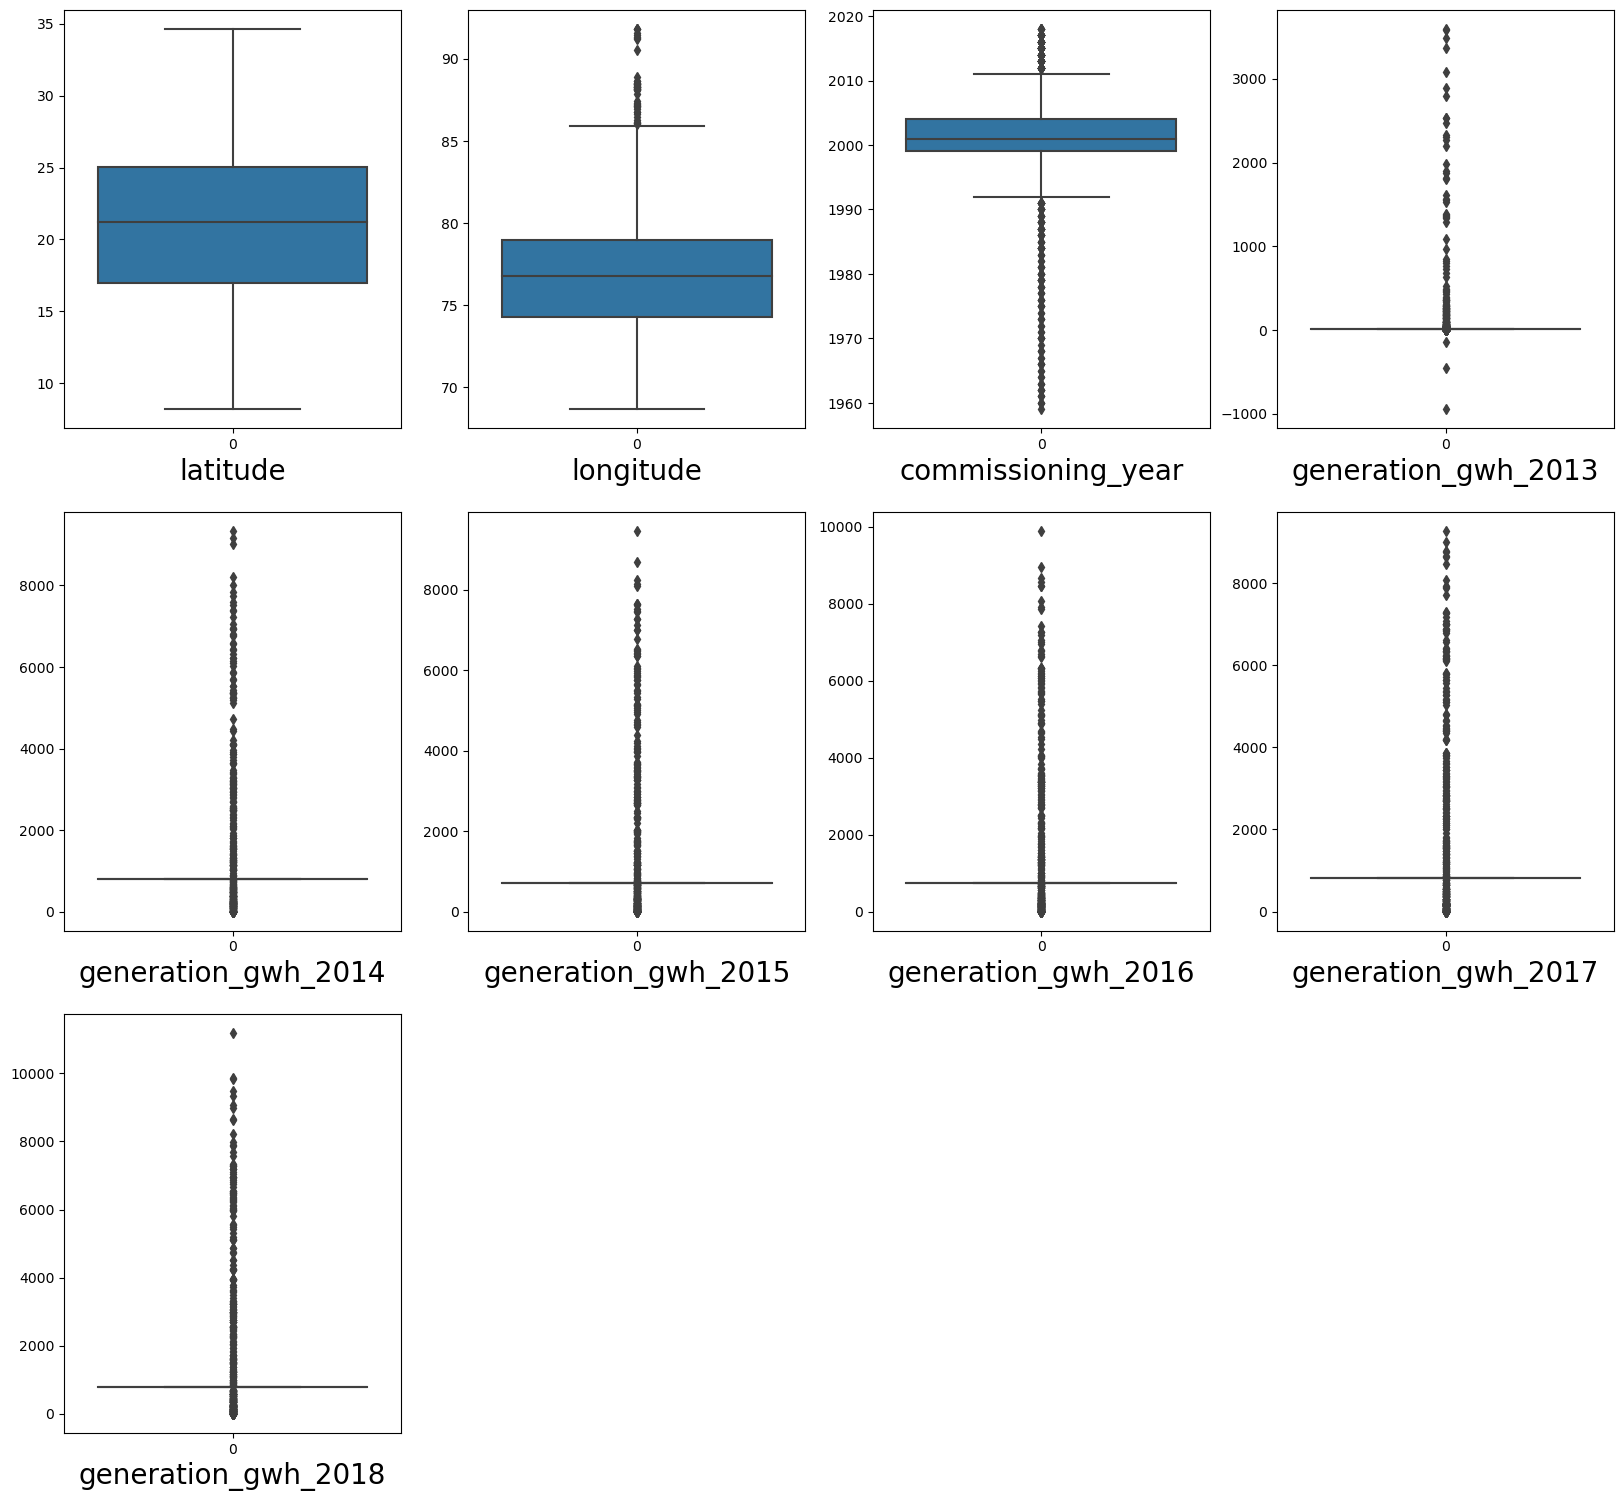

In [70]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
x = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in x:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [71]:
df.skew()

capacity_mw            2.177910
latitude              -0.122369
longitude              0.912968
commissioning_year    -1.293652
generation_gwh_2013    5.452431
generation_gwh_2014    2.926882
generation_gwh_2015    2.708506
generation_gwh_2016    2.615338
generation_gwh_2017    2.508859
generation_gwh_2018    2.606422
dtype: float64

In [72]:
df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.122369
longitude              0.912968
commissioning_year    -1.293652
generation_gwh_2013    5.452431
generation_gwh_2014    2.926882
generation_gwh_2015    2.708506
generation_gwh_2016    2.615338
generation_gwh_2017    2.508859
generation_gwh_2018    2.606422
dtype: float64

## Outliers and Skewness are present in all columns except Latitude.

### To reduce Skewness using Power Transformer

In [78]:
from sklearn.preprocessing import PowerTransformer

In [83]:
pt= PowerTransformer(method='yeo-johnson', standardize=True)

In [86]:
df4 = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [87]:
transformed= pt.fit_transform(df4)

In [88]:
transformed = pd.DataFrame(transformed, columns=df4.columns)

In [89]:
transformed.skew()

latitude              -0.069318
longitude              0.000698
commissioning_year    -0.339367
generation_gwh_2013   -1.259313
generation_gwh_2014    0.230032
generation_gwh_2015    0.162574
generation_gwh_2016    0.141517
generation_gwh_2017    0.122499
generation_gwh_2018    0.124967
dtype: float64

In [90]:
transformed.index = df.index

In [91]:
df[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=transformed[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [92]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,1.172890,-0.927437,Solar,2011,National Renewable Energy Laboratory,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171
1,98.0,0.597321,-0.510149,Coal,2001,WRI,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171
2,39.2,0.120072,-2.355554,Wind,2001,WRI,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171
3,135.0,0.447588,2.442857,Gas,2004,WRI,-0.230773,-0.261805,0.106685,0.104854,-0.199249,-0.226525
4,1800.0,0.129446,1.250807,Coal,2015,WRI,-0.182182,1.425269,2.278141,2.259345,1.960573,2.314794
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.800141,0.217066,Coal,2016,WRI,-0.182182,-0.044698,-2.472981,-0.838173,0.009629,-0.158967
903,3.0,-1.346642,0.406449,Solar,2001,Industry About,-0.233135,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171
904,25.5,-0.964892,-0.237047,Wind,2001,WRI,-0.232507,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171
905,80.0,0.527627,-0.768103,Coal,2001,WRI,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171


In [93]:
df2 = df.copy()

## Encoding using get_dummies()

In [94]:
dummies = pd.get_dummies(df[['geolocation_source','primary_fuel']], drop_first = False)

In [95]:
df2 = df2.join(dummies)

In [96]:
df2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)

In [97]:
df2

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.172890,-0.927437,2011,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,...,1,0,0,0,0,0,0,0,1,0
1,98.0,0.597321,-0.510149,2001,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,...,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120072,-2.355554,2001,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,...,0,1,0,0,0,0,0,0,0,1
3,135.0,0.447588,2.442857,2004,-0.230773,-0.261805,0.106685,0.104854,-0.199249,-0.226525,...,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.129446,1.250807,2015,-0.182182,1.425269,2.278141,2.259345,1.960573,2.314794,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.800141,0.217066,2016,-0.182182,-0.044698,-2.472981,-0.838173,0.009629,-0.158967,...,0,1,0,1,0,0,0,0,0,0
903,3.0,-1.346642,0.406449,2001,-0.233135,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,...,0,0,0,0,0,0,0,0,1,0
904,25.5,-0.964892,-0.237047,2001,-0.232507,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,...,0,1,0,0,0,0,0,0,0,1
905,80.0,0.527627,-0.768103,2001,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,...,0,1,0,1,0,0,0,0,0,0


## correlation

In [99]:
corr = df2.corr()
corr

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.046522,0.256905,0.244613,-0.011052,0.466365,0.518858,0.580564,0.603644,0.607767,...,-0.032191,0.235689,-0.142742,0.491885,0.060206,-0.105665,0.158105,-0.065984,-0.239128,-0.223061
latitude,0.046522,1.000000,-0.068171,0.081644,0.005132,0.099003,0.094998,0.114589,0.095758,0.101761,...,0.073848,-0.208989,-0.148006,0.047133,-0.069111,0.099520,-0.050963,-0.082579,0.206258,-0.192287
longitude,0.256905,-0.068171,1.000000,0.065738,-0.001542,0.035156,0.035510,0.089219,0.077007,0.089531,...,-0.085973,0.306605,-0.058972,0.328086,0.008067,0.159200,-0.014555,-0.059357,-0.299307,-0.251401
commissioning_year,0.244613,0.081644,0.065738,1.000000,-0.041045,0.069202,0.124395,0.198628,0.179320,0.183256,...,0.079082,-0.059856,0.027731,0.288031,0.081947,-0.434955,-0.043236,-0.035396,0.075766,0.044506
generation_gwh_2013,-0.011052,0.005132,-0.001542,-0.041045,1.000000,-0.001818,-0.014970,-0.010366,-0.005476,0.003506,...,-0.014696,0.018213,-0.042622,-0.020522,0.044347,0.033392,-0.020003,-0.005907,-0.018763,0.006786
generation_gwh_2014,0.466365,0.099003,0.035156,0.069202,-0.001818,1.000000,0.838142,0.780052,0.707323,0.710017,...,-0.003084,0.021727,-0.011097,0.330007,-0.156485,-0.177944,0.157948,-0.169651,-0.024892,-0.021281
generation_gwh_2015,0.518858,0.094998,0.035510,0.124395,-0.014970,0.838142,1.000000,0.877367,0.765996,0.765439,...,-0.003563,0.024844,-0.012818,0.338618,-0.091350,-0.203951,0.116200,-0.190774,-0.027087,-0.024596
generation_gwh_2016,0.580564,0.114589,0.089219,0.198628,-0.010366,0.780052,0.877367,1.000000,0.895652,0.885188,...,-0.003177,0.013480,-0.011429,0.388545,-0.146797,-0.216501,0.082202,-0.207863,-0.017329,-0.024148
generation_gwh_2017,0.603644,0.095758,0.077007,0.179320,-0.005476,0.707323,0.765996,0.895652,1.000000,0.936345,...,-0.002488,0.009224,-0.008953,0.387101,-0.159115,-0.240118,0.079344,-0.137675,-0.012825,-0.019289
generation_gwh_2018,0.607767,0.101761,0.089531,0.183256,0.003506,0.710017,0.765439,0.885188,0.936345,1.000000,...,-0.003048,0.012593,-0.010966,0.378651,-0.178475,-0.197143,0.095394,-0.209182,-0.015633,-0.016883


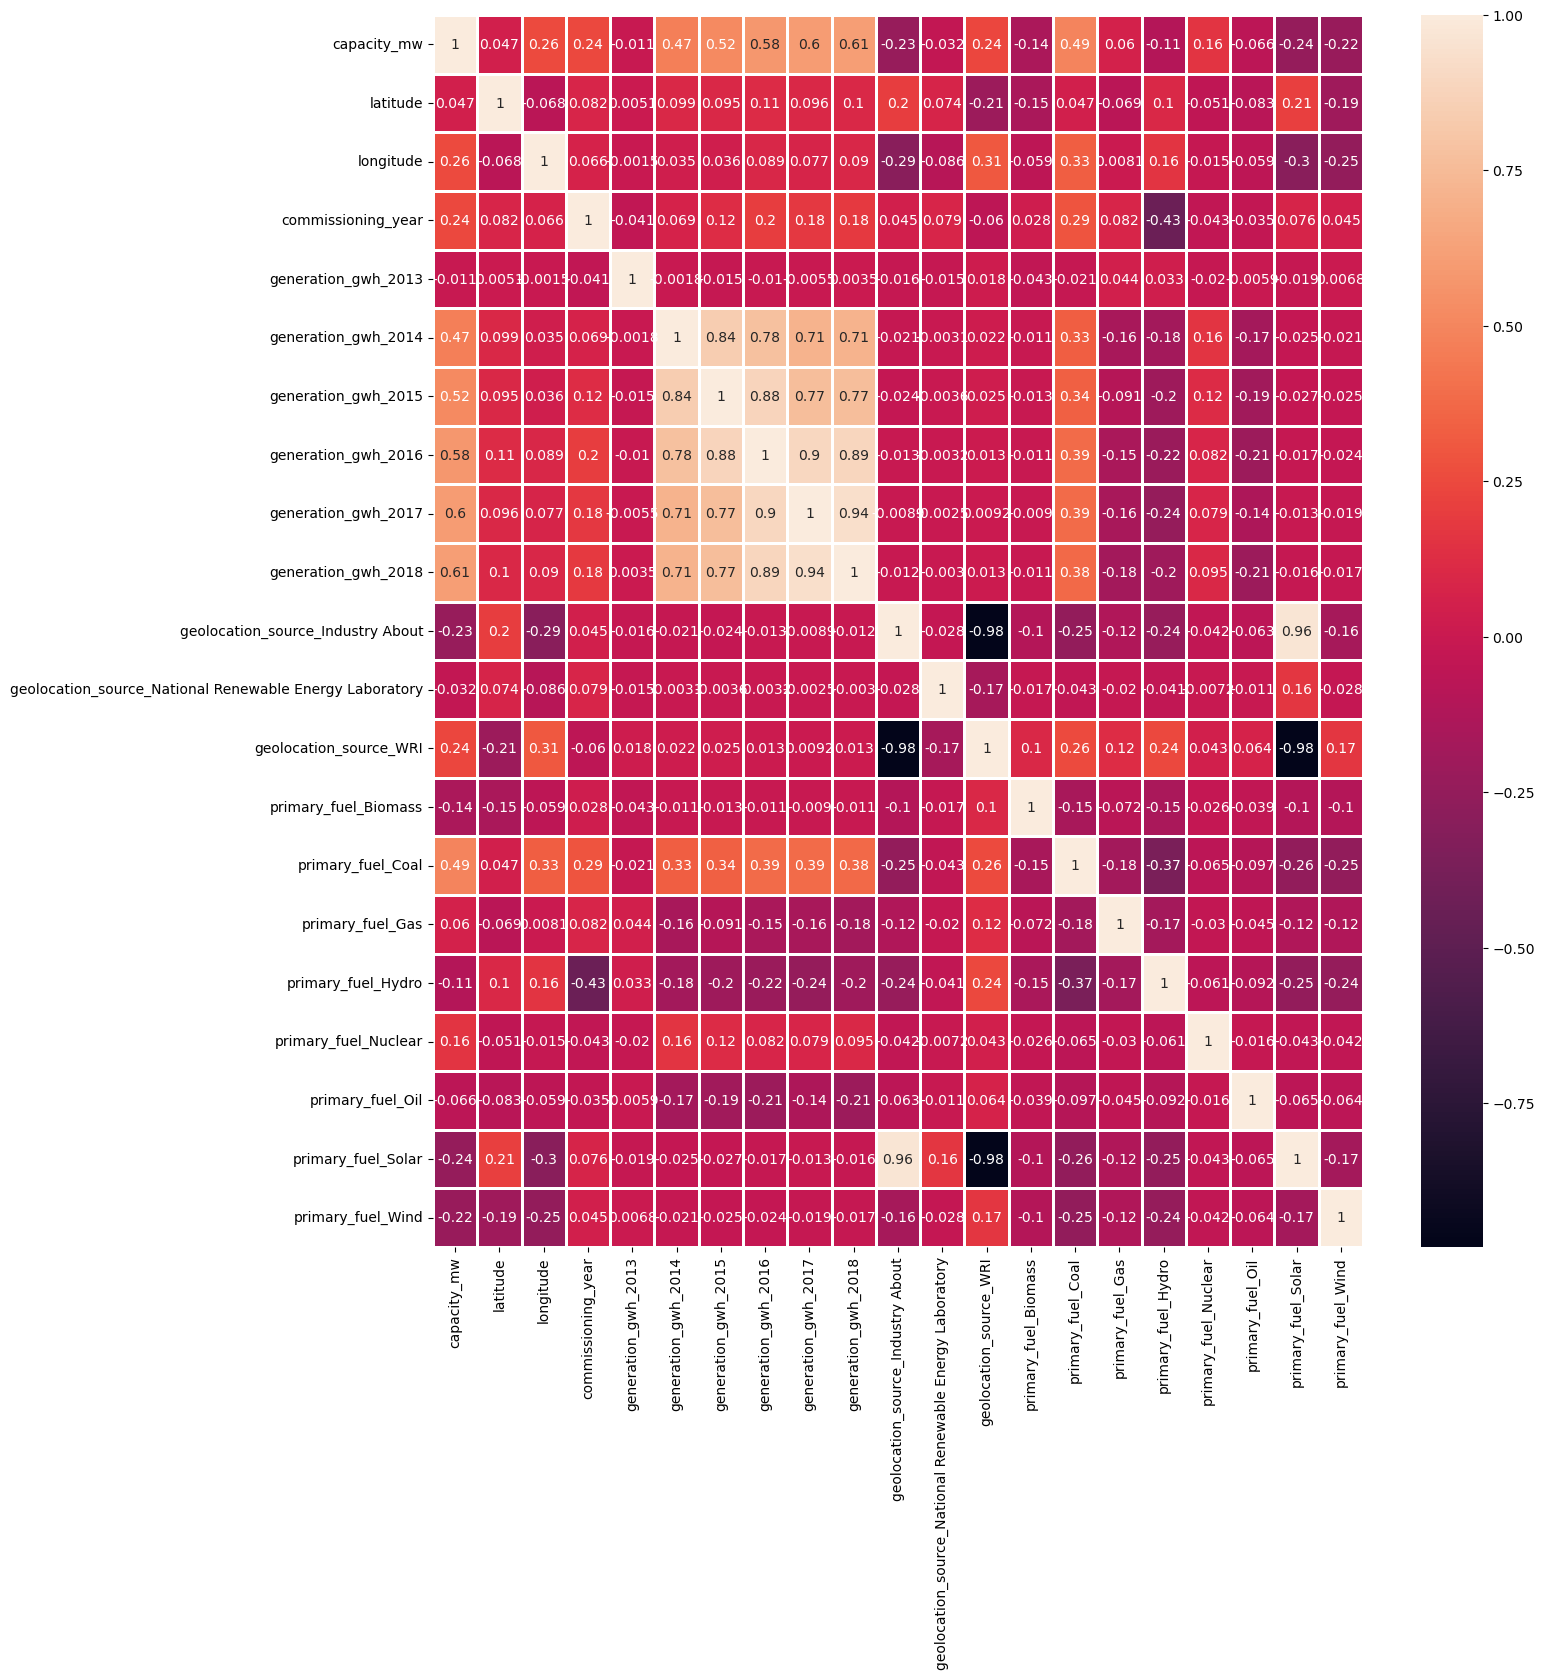

In [100]:
plt.figure(figsize=(15,16))
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

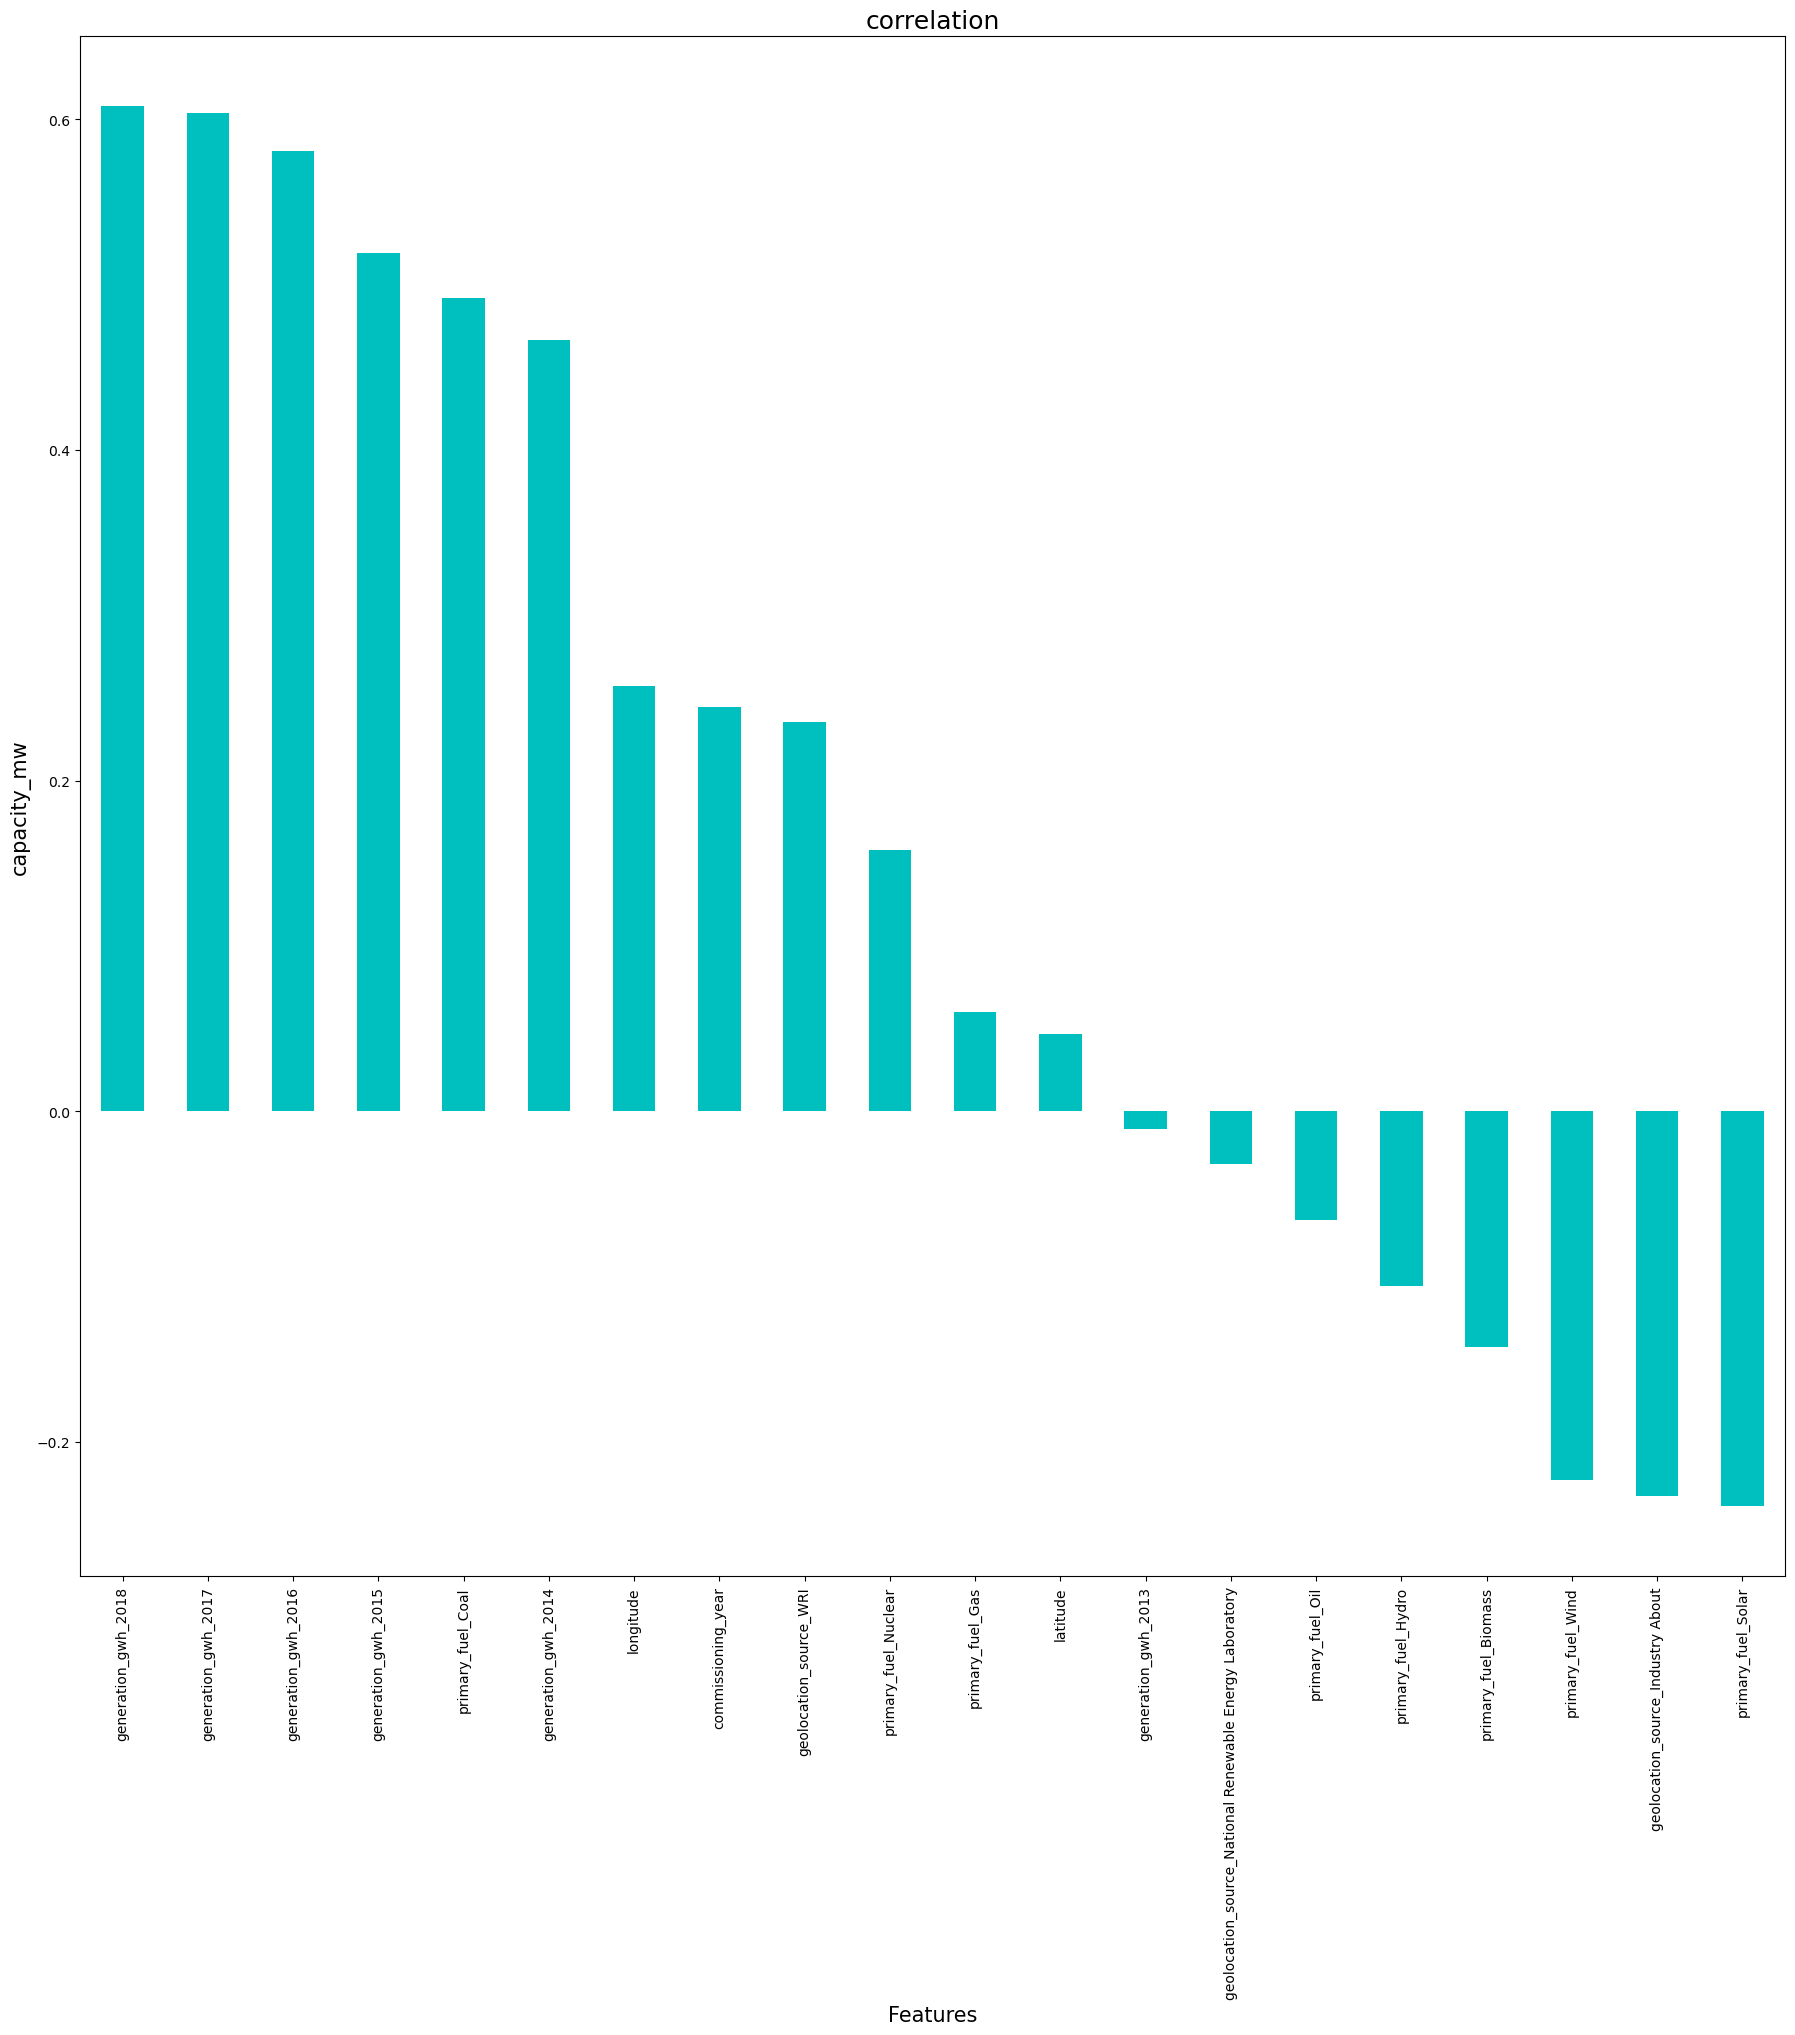

In [101]:
plt.figure(figsize = (22,20))
df2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
x = df2.drop(columns = ['capacity_mw'])
y = df2['capacity_mw']

In [104]:
scaler= StandardScaler()
scaled_x = scaler.fit_transform(x)

## check multicolinnerity problem

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
vif = pd.DataFrame()

In [107]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [108]:
vif.head(10)

,Features,vif
0,latitude,1.177617
1,longitude,1.360395
2,commissioning_year,1.381580
3,generation_gwh_2013,1.008954
4,generation_gwh_2014,3.658308
5,generation_gwh_2015,6.153762
6,generation_gwh_2016,10.016733
7,generation_gwh_2017,10.478197
8,generation_gwh_2018,9.444899
9,geolocation_source_Industry About,inf


### multicolinnerity availble in generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018

In [109]:
from sklearn.feature_selection import SelectKBest, f_classif

In [110]:
best = SelectKBest(score_func = f_classif, k =20)
fit = best.fit(x,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(x.columns)

In [111]:
fit = best.fit(x,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(x.columns)
dfcolumn.head()

featureScores = pd.concat([dfcolumn,dfscore],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(20,'Score'))

                                              Feature     Score
14                                   primary_fuel_Gas  5.568786
8                                 generation_gwh_2018  4.713943
7                                 generation_gwh_2017  4.557249
6                                 generation_gwh_2016  4.216844
16                               primary_fuel_Nuclear  3.605661
19                                  primary_fuel_Wind  3.481599
9                   geolocation_source_Industry About  3.375952
4                                 generation_gwh_2014  3.309325
11                             geolocation_source_WRI  3.255424
13                                  primary_fuel_Coal  3.216512
18                                 primary_fuel_Solar  3.186319
5                                 generation_gwh_2015  3.075101
17                                   primary_fuel_Oil  2.445447
15                                 primary_fuel_Hydro  1.975727
2                                  commi

In [112]:
x_best = x.drop(columns=['generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']).copy()

In [113]:
scaled_x_best = scaler.fit_transform(x_best)

## Regression Model Building

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
from sklearn.metrics import r2_score

In [116]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    rf =  RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8234095317838903 on random_state: 61


In [117]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, test_size = 0.31, random_state = 7)

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [119]:
from sklearn.metrics import r2_score,mean_squared_error

In [120]:
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
xgr = XGBRegressor()
svr= SVR()
r=Ridge()

In [121]:
rfr.fit(x_train,y_train)
dtr.fit(x_train, y_train)
xgr.fit(x_train,y_train)
svr.fit(x_train,y_train)
r.fit(x_train,y_train)

Ridge()

### Ridge Regression Model

In [122]:
y_pred = r.predict(x_test)
r2_score(y_test,y_pred)

0.515755887496369

In [123]:
mean_squared_error(y_test,y_pred)

90122.66980925674

In [124]:
np.sqrt(mean_squared_error(y_test,y_pred))

300.2043800634107

## Random Forest Regression Model

In [125]:
y_pred = rfr.predict(x_test)
r2_score(y_test,y_pred)

0.6721986882733221

In [126]:
mean_squared_error(y_test,y_pred)

61007.10079270838

In [127]:
np.sqrt(mean_squared_error(y_test,y_pred))

246.99615542090606

## XGB Regression Model

In [128]:
y_pred = xgr.predict(x_test)
r2_score(y_test,y_pred)

0.7044933162348956

In [129]:
mean_squared_error(y_test,y_pred)

54996.74771408038

In [130]:
np.sqrt(mean_squared_error(y_test,y_pred))

234.51385399178528

## Support Vector Regression Model

In [132]:
y_pred = svr.predict(x_test)
r2_score(y_test,y_pred)

-0.17265537635656392

In [133]:
mean_squared_error(y_test,y_pred)

218242.88732604854

In [134]:
np.sqrt(mean_squared_error(y_test,y_pred))

467.1647325366594

## Decision Tree Regression Model

In [136]:
y_pred = dtr.predict(x_test)
r2_score(y_test,y_pred)

0.40570828141732684

In [138]:
mean_squared_error(y_test,y_pred)

110603.6293292061

In [139]:
np.sqrt(mean_squared_error(y_test,y_pred))

332.5712394799137

## cross validation

In [140]:
from sklearn.model_selection import cross_val_score

## Ridge Regression

In [141]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.4780797884566986

## Random Forest Regression

In [143]:
cross_val_score(rfr,scaled_x_best,y,cv=5).mean()

0.6922972159126958

## XGB Regression

In [144]:
cross_val_score(xgr,scaled_x_best,y,cv=5).mean()

0.6532948038412989

## SVR Regression

In [145]:
cross_val_score(svr,scaled_x_best,y,cv=5).mean()

-0.1651403194709975

## Decision Tree Regression

In [146]:
cross_val_score(dtr,scaled_x_best,y,cv=5).mean()

0.38497557791933074

### using XGB Regression Model we get 70.44% accuracy

### Saving The Model

In [165]:
from pickle import dump
dump(xgr,open('Bestpowercapacitymodel.pkl','wb'))

In [166]:
import pickle
loaded_model = pickle.load(open('Bestpowercapacitymodel.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

70.44933162348957


In [167]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
Predicted,5.557649,1123.354492,3.347338,30.157942,1188.377197,1357.394653,625.198303,169.066864,59.590794,31.773657,...,1800.544434,44.567902,252.801315,49.845558,67.300346,10.095305,18.656651,26.584444,31.467327,12.565567
Original,15.000000,1200.000000,4.000000,39.000000,1500.000000,1980.000000,600.000000,234.000000,75.000000,44.000000,...,1320.000000,50.400000,300.000000,26.400000,65.000000,5.000000,39.200000,55.000000,24.000000,1.000000


## Model to predict Primary Fuel

In [168]:
dumm = pd.get_dummies(df[['geolocation_source']],drop_first = False)

In [169]:
df = df.join(dumm)

In [170]:
df.drop(columns = ['geolocation_source'],axis = 1, inplace = True)

### Label Encoding

In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
label = LabelEncoder()

In [173]:
df['primary_fuel'] = label.fit_transform(df['primary_fuel'])

In [174]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,1.172890,-0.927437,6,2011,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,0,1,0
1,98.0,0.597321,-0.510149,1,2001,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,0,0,1
2,39.2,0.120072,-2.355554,7,2001,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,0,0,1
3,135.0,0.447588,2.442857,2,2004,-0.230773,-0.261805,0.106685,0.104854,-0.199249,-0.226525,0,0,1
4,1800.0,0.129446,1.250807,1,2015,-0.182182,1.425269,2.278141,2.259345,1.960573,2.314794,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.800141,0.217066,1,2016,-0.182182,-0.044698,-2.472981,-0.838173,0.009629,-0.158967,0,0,1
903,3.0,-1.346642,0.406449,6,2001,-0.233135,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,1,0,0
904,25.5,-0.964892,-0.237047,7,2001,-0.232507,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,0,0,1
905,80.0,0.527627,-0.768103,1,2001,-0.182182,-0.044698,-0.051631,-0.046035,-0.036061,-0.044171,0,0,1


In [175]:
corr = df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.046522,0.256905,-0.400465,0.244613,-0.011052,0.466365,0.518858,0.580564,0.603644,0.607767,-0.232614,-0.032191,0.235689
latitude,0.046522,1.000000,-0.068171,0.000245,0.081644,0.005132,0.099003,0.094998,0.114589,0.095758,0.101761,0.197290,0.073848,-0.208989
longitude,0.256905,-0.068171,1.000000,-0.408056,0.065738,-0.001542,0.035156,0.035510,0.089219,0.077007,0.089531,-0.293872,-0.085973,0.306605
primary_fuel,-0.400465,0.000245,-0.408056,1.000000,-0.073951,0.009520,-0.145842,-0.163761,-0.176097,-0.160792,-0.163193,0.474313,0.081186,-0.483619
commissioning_year,0.244613,0.081644,0.065738,-0.073951,1.000000,-0.041045,0.069202,0.124395,0.198628,0.179320,0.183256,0.045033,0.079082,-0.059856
generation_gwh_2013,-0.011052,0.005132,-0.001542,0.009520,-0.041045,1.000000,-0.001818,-0.014970,-0.010366,-0.005476,0.003506,-0.015558,-0.014696,0.018213
generation_gwh_2014,0.466365,0.099003,0.035156,-0.145842,0.069202,-0.001818,1.000000,0.838142,0.780052,0.707323,0.710017,-0.021421,-0.003084,0.021727
generation_gwh_2015,0.518858,0.094998,0.035510,-0.163761,0.124395,-0.014970,0.838142,1.000000,0.877367,0.765996,0.765439,-0.024487,-0.003563,0.024844
generation_gwh_2016,0.580564,0.114589,0.089219,-0.176097,0.198628,-0.010366,0.780052,0.877367,1.000000,0.895652,0.885188,-0.013040,-0.003177,0.013480
generation_gwh_2017,0.603644,0.095758,0.077007,-0.160792,0.179320,-0.005476,0.707323,0.765996,0.895652,1.000000,0.936345,-0.008861,-0.002488,0.009224


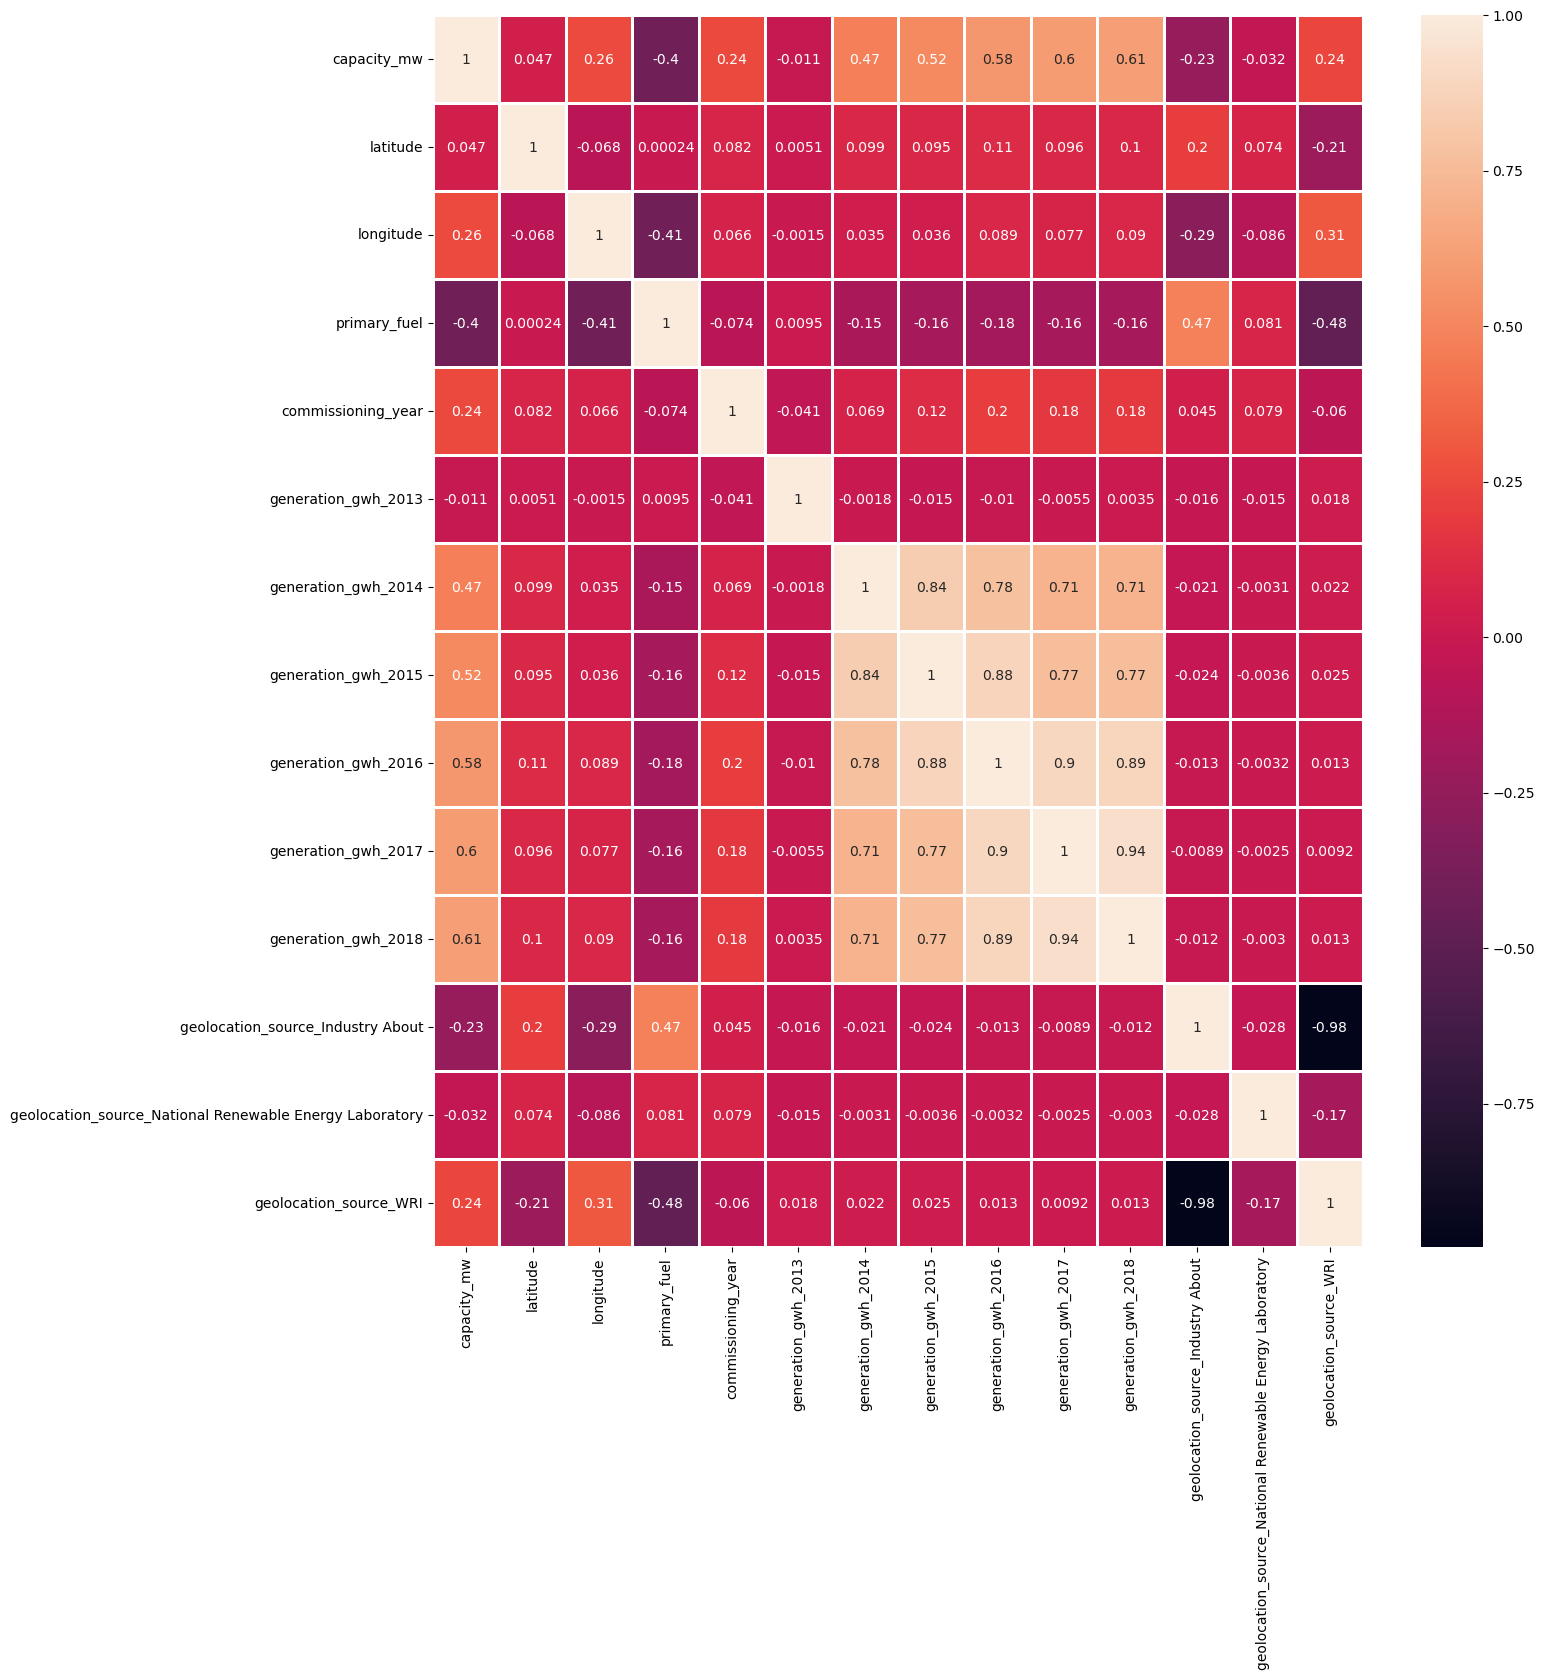

In [176]:
plt.figure(figsize=(15,16))
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

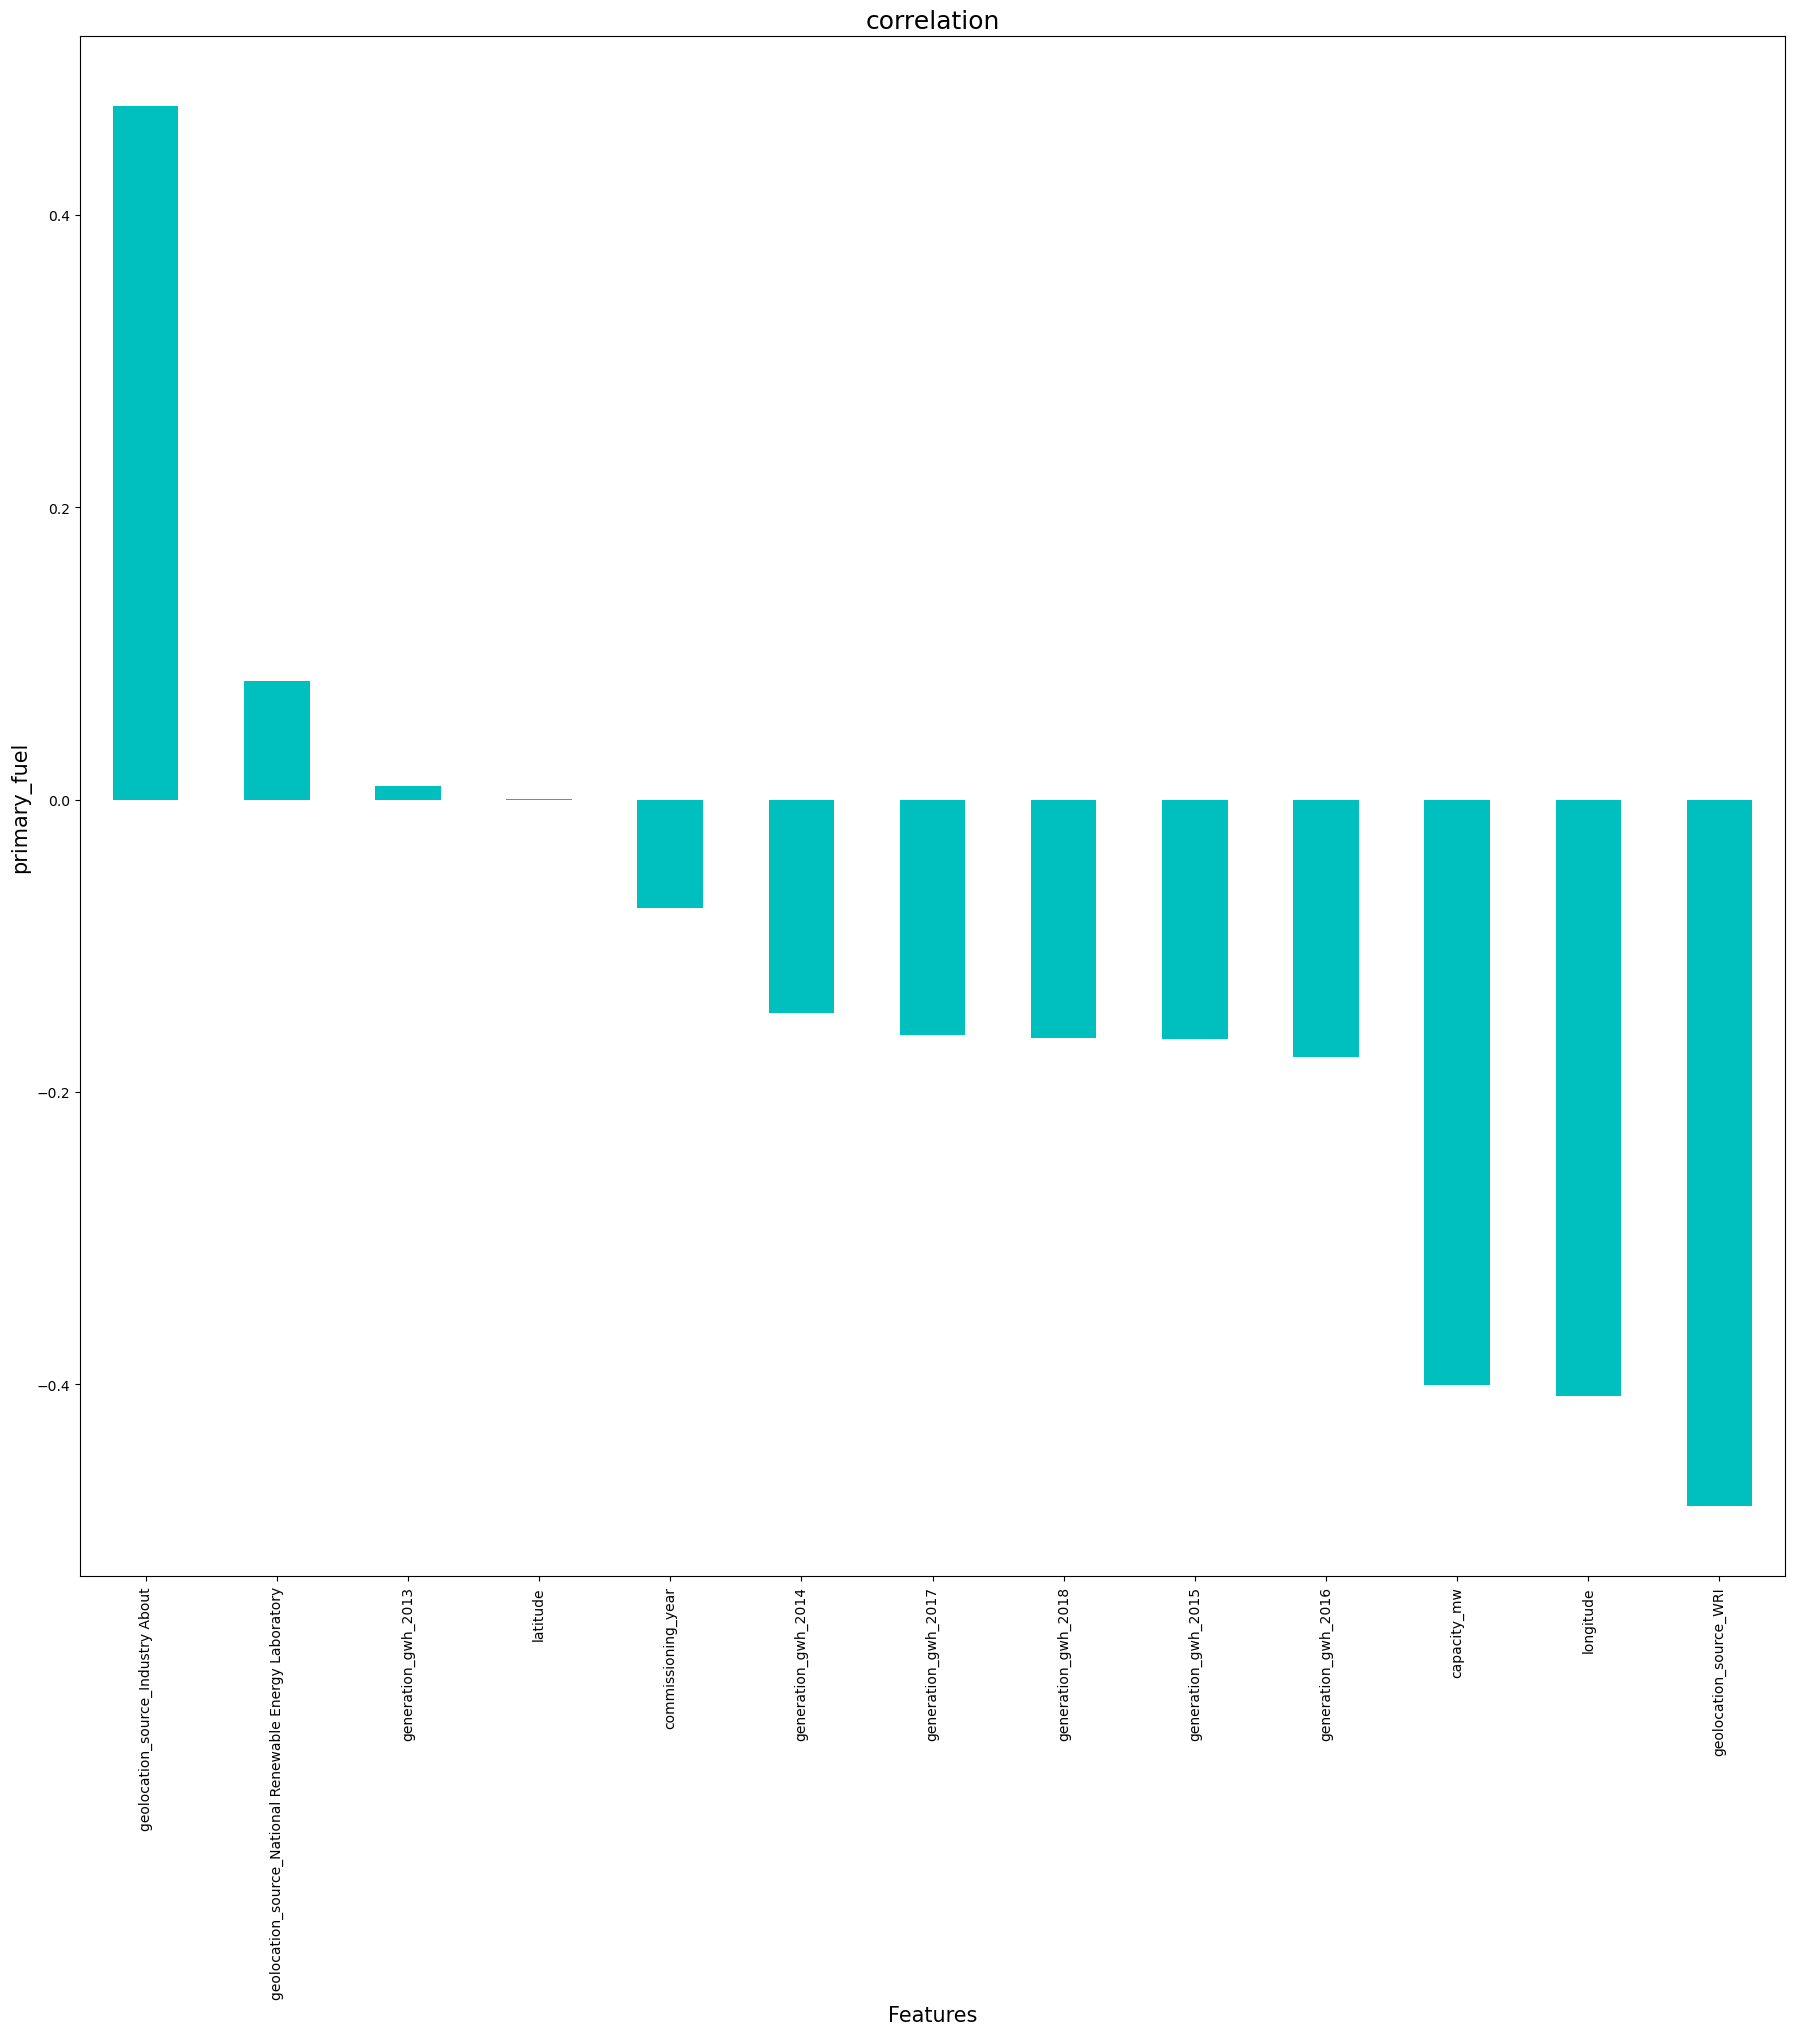

In [177]:
plt.figure(figsize = (22,20))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [178]:
x = df.drop(columns = ['primary_fuel'])
y = df['primary_fuel']

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler= StandardScaler()
scaled_x = scaler.fit_transform(x)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
vif = pd.DataFrame()

In [183]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [185]:
vif

,Features,vif
0,capacity_mw,1.909338
1,latitude,1.068554
2,longitude,1.173125
3,commissioning_year,1.121436
4,generation_gwh_2013,1.003733
5,generation_gwh_2014,3.546197
6,generation_gwh_2015,6.066588
7,generation_gwh_2016,9.868349
8,generation_gwh_2017,9.958232
9,generation_gwh_2018,9.103644


In [186]:
from sklearn.feature_selection import SelectKBest, f_classif

In [187]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [189]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

dfcolumns.head()

featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
12                             geolocation_source_WRI  3098.775220
10                  geolocation_source_Industry About  1498.588016
0                                         capacity_mw    57.598406
2                                           longitude    36.417700
3                                  commissioning_year    33.032078
9                                 generation_gwh_2018    32.477685
7                                 generation_gwh_2016    32.353135
8                                 generation_gwh_2017    29.735377
5                                 generation_gwh_2014    25.923895
6                                 generation_gwh_2015    24.694408
1                                            latitude    14.924001
11  geolocation_source_National Renewable Energy L...     3.331121
4                                 generation_gwh_2013     0.651513


In [ ]:
x_best = X.drop(columns=['generation_gwh_2016','geolocation_source_National Renewable Energy Laboratory']).copy()

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [194]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8549618320610687 on random_state: 7


In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31,random_state = 24)

In [198]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [199]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
log= LogisticRegression()
SV =  SVC(probability=True)
KNN = KNeighborsClassifier()

In [201]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
adbc.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
log.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

KNeighborsClassifier()

## using LogisticRegression

In [202]:
y_pred = log.predict(x_test)
accu = classification_report(y_test,y_pred)

In [204]:
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 0,  0,  0,  2,  0,  0, 11,  0],
       [ 0, 32,  0, 29,  0,  0,  7,  0],
       [ 0, 12,  0, 15,  0,  0,  1,  0],
       [ 0, 13,  0, 31,  0,  0, 19,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0,  2,  0],
       [ 0,  0,  0,  8,  0,  0, 32,  0],
       [ 0,  0,  0, 13,  0,  0, 29,  0]], dtype=int64)

In [205]:
print(accu)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.54      0.47      0.50        68
           2       0.00      0.00      0.00        28
           3       0.30      0.49      0.38        63
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.32      0.80      0.45        40
           7       0.00      0.00      0.00        42

    accuracy                           0.36       262
   macro avg       0.15      0.22      0.17       262
weighted avg       0.26      0.36      0.29       262



##  using RandomForestClassifier

In [206]:
y_pred = RFC.predict(x_test)
accu = classification_report(y_test,y_pred)

In [207]:
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[10,  3,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  3, 10,  0,  0,  0,  3],
       [ 0, 10,  8,  6,  0,  4,  0,  0],
       [ 0,  7,  0, 55,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  4,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0],
       [ 1,  4,  0,  2,  0,  0,  0, 35]], dtype=int64)

In [208]:
print(accu)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.68      0.76      0.72        68
           2       0.53      0.29      0.37        28
           3       0.75      0.87      0.81        63
           4       0.00      0.00      0.00         2
           5       0.29      0.33      0.31         6
           6       1.00      1.00      1.00        40
           7       0.90      0.83      0.86        42

    accuracy                           0.77       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.76      0.77      0.76       262



## using XGBClassifier

In [209]:
y_pred = XGBC.predict(x_test)
accu = classification_report(y_test,y_pred)

In [210]:
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[10,  3,  0,  0,  0,  0,  0,  0],
       [ 1, 54,  1,  9,  0,  0,  0,  3],
       [ 0,  9, 10,  7,  0,  2,  0,  0],
       [ 1,  5,  1, 53,  1,  1,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  1],
       [ 2,  7,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [212]:
print(accu)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.68      0.79      0.73        68
           2       0.71      0.36      0.48        28
           3       0.75      0.84      0.79        63
           4       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         6
           6       1.00      0.97      0.99        40
           7       0.87      0.79      0.82        42

    accuracy                           0.77       262
   macro avg       0.65      0.63      0.63       262
weighted avg       0.77      0.77      0.76       262



## using AdaBoostClassifier

In [213]:
y_pred = adbc.predict(x_test)
accu = classification_report(y_test,y_pred)

In [214]:
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 0,  0,  0, 13,  0,  0,  0,  0],
       [ 0, 20,  0, 36, 12,  0,  0,  0],
       [ 0,  9,  0, 19,  0,  0,  0,  0],
       [ 0,  9,  0, 54,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0, 38,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0]], dtype=int64)

In [215]:
print(accu)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      0.29      0.37        68
           2       0.00      0.00      0.00        28
           3       0.31      0.86      0.46        63
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.97        40
           7       0.00      0.00      0.00        42

    accuracy                           0.43       262
   macro avg       0.23      0.26      0.23       262
weighted avg       0.36      0.43      0.36       262



## using SVC

In [216]:
y_pred = SV.predict(x_test)
accu = classification_report(y_test,y_pred)

In [217]:
print(accu)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.63      0.43      0.51        68
           2       0.00      0.00      0.00        28
           3       0.25      0.87      0.39        63
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        42

    accuracy                           0.32       262
   macro avg       0.11      0.16      0.11       262
weighted avg       0.22      0.32      0.23       262



## using KNeighborsClassifier

In [219]:
y_pred = KNN.predict(x_test)
accu = classification_report(y_test,y_pred)

In [220]:
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 8,  4,  0,  0,  0,  0,  0,  1],
       [ 3, 35,  7, 14,  3,  0,  0,  6],
       [ 1, 10,  8,  8,  0,  0,  0,  1],
       [ 5, 14,  5, 37,  0,  0,  1,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  2],
       [ 2,  3,  2,  1,  0,  0, 29,  3],
       [15,  8,  1,  3,  0,  0,  3, 12]], dtype=int64)

In [221]:
print(accu)

              precision    recall  f1-score   support

           0       0.24      0.62      0.34        13
           1       0.44      0.51      0.48        68
           2       0.35      0.29      0.31        28
           3       0.58      0.59      0.58        63
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.88      0.72      0.79        40
           7       0.46      0.29      0.35        42

    accuracy                           0.49       262
   macro avg       0.37      0.38      0.36       262
weighted avg       0.51      0.49      0.49       262



In [223]:
from sklearn.model_selection import cross_val_score as cvs

In [226]:
print(cvs(log,x,y,cv=5).mean())             #using logisticregression
print(cvs(RFC,x,y,cv=5).mean())     #using randomforestregression
print(cvs(XGBC,x,y,cv=5).mean())    #using xgb
print(cvs(adbc,x,y,cv=5).mean())    # using adaboost
print(cvs(SV,x,y,cv=5).mean())      # using svr
print(cvs(KNN,x,y,cv=5).mean())     # using knn

0.42535221189067346
0.8021414482952943
0.8021696252465483
0.4656382079459003
0.3779726683572837
0.5746970977740209


In [227]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [228]:
pip install scikit-plot

  Obtaining dependency information for scikit-plot from https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [229]:
import scikitplot as sktplt

## Logistic Regression

In [230]:
lr_prob = log.predict_proba(x_test)

In [231]:
roc_auc_score(y_test,lr_prob,multi_class='ovo',average='weighted')

0.7579511198685778

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

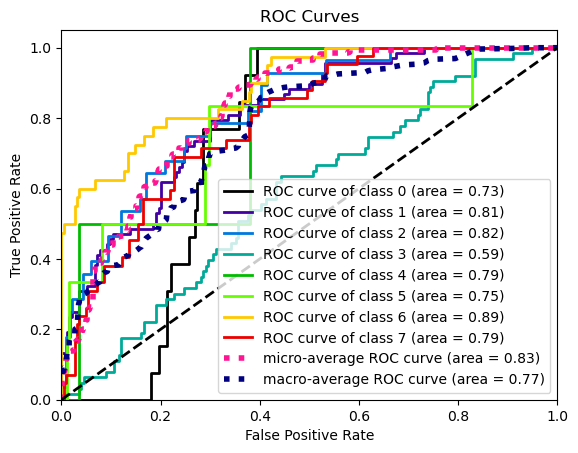

In [232]:
sktplt.metrics.plot_roc(y_test,lr_prob)

## SV Classifier

In [233]:
SV=SVC(probability=True)

In [234]:
SV=SVC(probability=True).fit(x_train,y_train.ravel())

In [235]:
SVpred = SV.predict(x_test)

In [236]:
sv_prb = SV.predict_proba(x_test)

In [237]:
roc_auc_score(y_test,sv_prb,multi_class='ovo',average='weighted')

0.7588540661909705

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

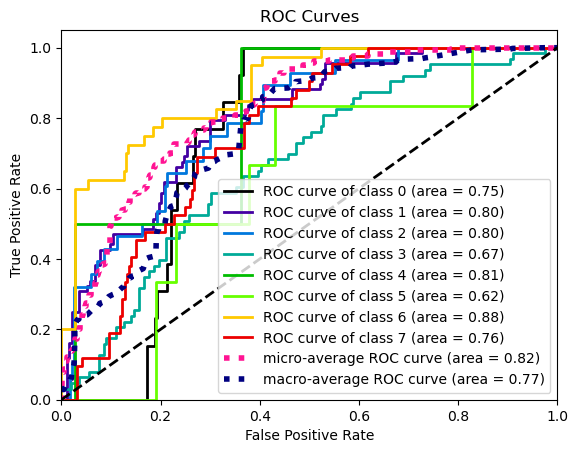

In [238]:
sktplt.metrics.plot_roc(y_test,sv_prb)

## Adaboost Classifier

In [239]:
adbc_prob = adbc.predict_proba(x_test)

In [240]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo',average='weighted')

0.6793196031593298

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

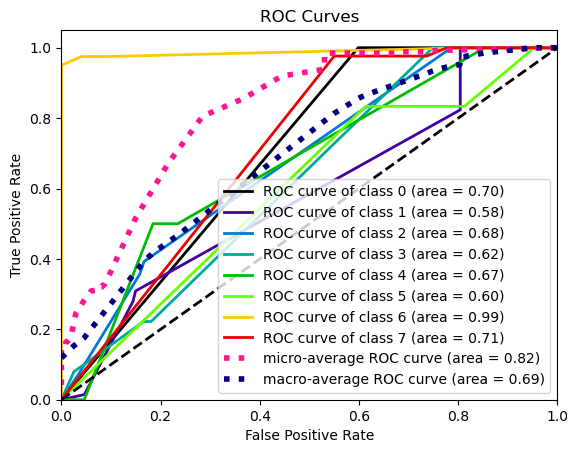

In [241]:
sktplt.metrics.plot_roc(y_test,adbc_prob)

## XGB Classifier

In [242]:
XGBC_prob = XGBC.predict_proba(x_test)

In [243]:
roc_auc_score(y_test,XGBC_prob,multi_class='ovo',average='weighted')

0.9258437261183589

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

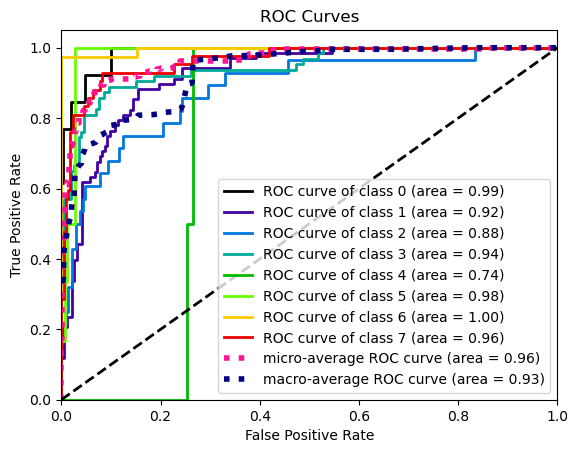

In [244]:
sktplt.metrics.plot_roc(y_test,XGBC_prob)

## Random Forest Classifier

In [245]:
RFC_prob = RFC.predict_proba(x_test)

In [246]:
roc_auc_score(y_test,RFC_prob,multi_class='ovo',average='weighted')

0.9381268523263679

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

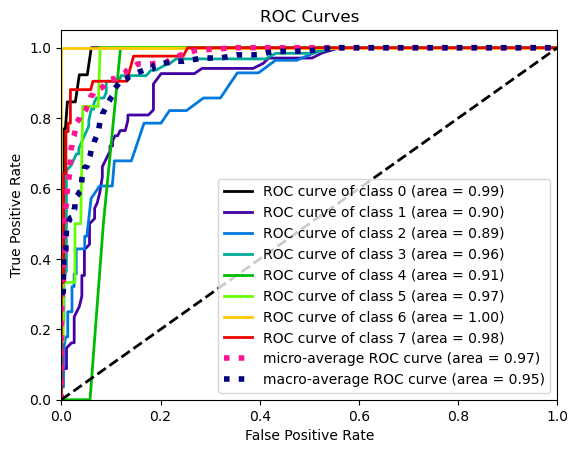

In [247]:
sktplt.metrics.plot_roc(y_test,RFC_prob)

## K Nearest Neighbours Classifier

In [248]:
KNN_prob = KNN.predict_proba(x_test)

In [249]:
roc_auc_score(y_test,KNN_prob,multi_class='ovo',average='weighted')

0.7496188889531151

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

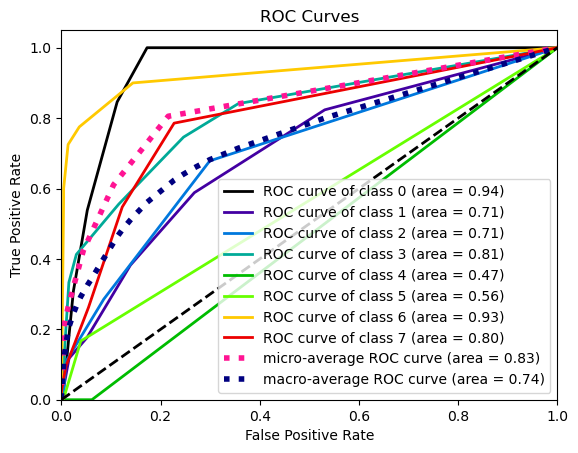

In [250]:
sktplt.metrics.plot_roc(y_test,KNN_prob)

In [251]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}


In [252]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [253]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [254]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [259]:
Best_mod1 = RandomForestClassifier(n_estimators = 50,criterion = 'gini', max_depth= 40, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 5)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

71.37404580152672


In [256]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [257]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [258]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'eta': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [10, 20, 40, 60, 80],
                         'min_child_weight': array([0, 1, 2, 3, 4]),
                         'subsample': [0.5, 1]},
             verbose=1)

In [260]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.3,
 'max_depth': 10,
 'min_child_weight': 2,
 'subsample': 1}

In [261]:
Best_mod2 = XGBClassifier(booster = 'gbtree',eta = 0.3, max_depth= 10, min_child_weight = 2, subsample = 1)
Best_mod2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [262]:
xgbpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

76.7175572519084


In [263]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[10,  3,  0,  0,  0,  0,  0,  0],
       [ 1, 51,  1, 12,  0,  0,  0,  3],
       [ 0,  6, 11,  8,  0,  3,  0,  0],
       [ 1,  6,  2, 53,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  2,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  1],
       [ 1,  7,  0,  0,  0,  0,  0, 34]], dtype=int64)

## Saving The Model

In [264]:
from pickle import dump
dump(Best_mod2,open('Bestfuelmodel.pkl','wb'))

In [265]:
import pickle
loaded_model = pickle.load(open('Bestfuelmodel.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

76.7175572519084


In [266]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
Predicted,6,7,1,0,3,1,6,7,1,5,...,7,1,1,6,3,3,3,3,6,2
Original,6,7,1,0,2,7,6,7,7,4,...,7,7,3,6,3,3,1,3,6,3


# END